<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span><ul class="toc-item"><li><span><a href="#Cases-and-Deaths-by-State" data-toc-modified-id="Cases-and-Deaths-by-State-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cases and Deaths by State</a></span></li><li><span><a href="#Impact-of-COVID-on-Stock-Market" data-toc-modified-id="Impact-of-COVID-on-Stock-Market-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Impact of COVID on Stock Market</a></span><ul class="toc-item"><li><span><a href="#Dow-Jones,-Nasdaq-and-SP500-During-COVID" data-toc-modified-id="Dow-Jones,-Nasdaq-and-SP500-During-COVID-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dow Jones, Nasdaq and SP500 During COVID</a></span></li><li><span><a href="#Dow-Jones" data-toc-modified-id="Dow-Jones-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Dow Jones</a></span></li><li><span><a href="#SP500" data-toc-modified-id="SP500-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>SP500</a></span></li><li><span><a href="#Nasdaq" data-toc-modified-id="Nasdaq-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Nasdaq</a></span></li><li><span><a href="#Stock-Market-since-1977" data-toc-modified-id="Stock-Market-since-1977-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Stock Market since 1977</a></span></li><li><span><a href="#Stock-Market-During-Historical-Pandemics" data-toc-modified-id="Stock-Market-During-Historical-Pandemics-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Stock Market During Historical Pandemics</a></span></li><li><span><a href="#Candlesticks" data-toc-modified-id="Candlesticks-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Candlesticks</a></span><ul class="toc-item"><li><span><a href="#Retail:-Walmart-(WMT)" data-toc-modified-id="Retail:-Walmart-(WMT)-1.2.7.1"><span class="toc-item-num">1.2.7.1&nbsp;&nbsp;</span>Retail: Walmart (WMT)</a></span></li><li><span><a href="#Grocery-&amp;-Pharmacy:-Walgreens-(WBA)" data-toc-modified-id="Grocery-&amp;-Pharmacy:-Walgreens-(WBA)-1.2.7.2"><span class="toc-item-num">1.2.7.2&nbsp;&nbsp;</span>Grocery &amp; Pharmacy: Walgreens (WBA)</a></span></li><li><span><a href="#Parks:-Vista-Outdoor-(VSTO)" data-toc-modified-id="Parks:-Vista-Outdoor-(VSTO)-1.2.7.3"><span class="toc-item-num">1.2.7.3&nbsp;&nbsp;</span>Parks: Vista Outdoor (VSTO)</a></span></li><li><span><a href="#Transit:-Delta-(DAL)" data-toc-modified-id="Transit:-Delta-(DAL)-1.2.7.4"><span class="toc-item-num">1.2.7.4&nbsp;&nbsp;</span>Transit: Delta (DAL)</a></span></li><li><span><a href="#Workplaces:-SL-Green-Realty-(SLG)" data-toc-modified-id="Workplaces:-SL-Green-Realty-(SLG)-1.2.7.5"><span class="toc-item-num">1.2.7.5&nbsp;&nbsp;</span>Workplaces: SL Green Realty (SLG)</a></span></li><li><span><a href="#Residential:-Amazon-(AMZN)" data-toc-modified-id="Residential:-Amazon-(AMZN)-1.2.7.6"><span class="toc-item-num">1.2.7.6&nbsp;&nbsp;</span>Residential: Amazon (AMZN)</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Google-Mobility-Analysis" data-toc-modified-id="Google-Mobility-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Google Mobility Analysis</a></span></li></ul></div>

# Objectives


Explore impact of COVID-19 on the stock market and compare it to historical pandemics.

Data Sources:
    
1) Finnhub API 
https://finnhub.io/api/v1
Provides realtime market data, global company fundamentals, economic data, and alternative data.

2) Kaggle - us_counties_covid19_daily(CSV) 
https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_counties_covid19_daily.csv
Provides data reported from the NYTimes COVID-19 Tracking Project on the number cases and deaths per state.

3) data.world - "Stock Market from a High Level"
https://data.world/chasewillden/stock-market-from-a-high-level
Reports S&P500, DowJones and Nasdaq prices since 1977. 

4) Google Community Mobility Reports 
https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/covid19_google_mobility?project=covid-project-301317&folder=&organizationId=
Reports  movement trends over time by geography, across different categories of places (such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential). The data it collects comes from google users who have opted to keep location services on (as with all samples, this may or may not be a representation of all users).

In [1]:
# Make sure to:
# pip install mpl_finance 
# pip install finnhub-python
# pip install pandas-datareader

In [4]:
# Import libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY

import seaborn as sns
sns.set_style('dark')

import pandas as pd 
import pandas_datareader.data as web
from pandas_datareader import data as dreader
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

import datetime
from datetime import datetime
import quandl

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import parallel_backend

import scipy.stats as st

import requests
from pprint import pprint
from config import *
import finnhub
import mpl_finance
from mpl_finance import candlestick_ohlc
from math import pi

from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.layouts import column
from bokeh.models import BooleanFilter, CDSView, Select, Range1d, HoverTool
from bokeh.palettes import Category10
from bokeh.models.formatters import NumeralTickFormatter
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.layouts import column

/opt/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


## Cases and Deaths by State

In [2]:
# Data from https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_counties_covid19_daily.csv
# FIPS is a census code
# Group by cases by date
Daily_State_Count = pd.read_csv('Resources/us_counties_covid19_daily.csv')
Daily_State_Count.head(3)

,date,county,state,fips,cases,deaths
0,1/21/20,Snohomish,Washington,53061.0,1,0.0
1,1/22/20,Snohomish,Washington,53061.0,1,0.0
2,1/23/20,Snohomish,Washington,53061.0,1,0.0


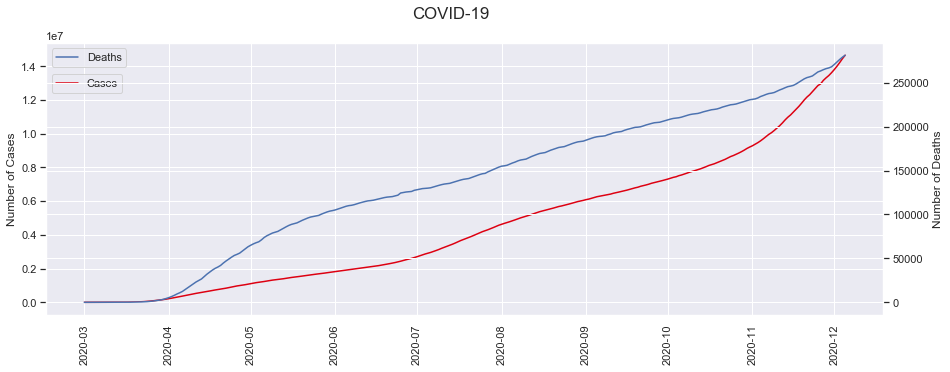

In [135]:
# Aggregate 
Daily_State_Count['date'] = pd.to_datetime(Daily_State_Count['date'])
grouped_df1 = Daily_State_Count.groupby("date").sum()
date_covid = grouped_df1.loc[(grouped_df1.index>='2020-03-01')&(grouped_df1.index<='2021-03-31')]

# Plot
plt.rcParams.update({'font.size': 14})
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle('COVID-19')
ax1.plot(x_axis,y_axis, color="#dd0011",label='Cases')
plt.xticks(rotation='vertical')
plt.legend(loc='center left',bbox_to_anchor=(0,.85))
ax2 = ax1.twinx()
ax2.plot(x_axis, y_axis2,label='Deaths')
ax2.tick_params(axis='y')
ax1.set_ylabel("Number of Cases")
ax2.set_ylabel("Number of Deaths")
plt.legend(loc='best')
plt.show()

In [136]:
# Combining indices
dow = pd.read_csv('Resources/DowJones.csv')
nasdaq = pd.read_csv('Resources/Nasdaq.csv')
sp500 = pd.read_csv('Resources/SP500.csv')
merged_df = pd.merge(dow,nasdaq, how='left', on='Date', suffixes=(' Dow', ' Nasdaq'))
merged_df = pd.merge(merged_df, sp500, how='left', on='Date')
merged_df.rename(columns={'Value': 'Value S&P 500'}, inplace=True)
merged_df.to_csv('Resources/merged.csv', index=False)
merged_df['Date']= pd.to_datetime(merged_df['Date'])

In [137]:
# Initializing lists for storing data
location = []
cases = []
deaths = []

# Querying API for COVID-19 data and appending it to appropriate list
r = requests.get(f'https://finnhub.io/api/v1/covid19/us?token={Api_key}').json()
for i in range(len(r)):
    result=r[i]
    location.append(result['state'])
    cases.append(result['case'])
    deaths.append(result['death'])

In [138]:
# Creating a Pandas DataFrame using dictionary
d = {'State':location,
    'Cases': cases,
    'Deaths': deaths}

df = pd.DataFrame(d)
df.head(3)

,State,Cases,Deaths
0,New York,1396947,42742
1,New Jersey,616454,21439
2,California,3273718,40231


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


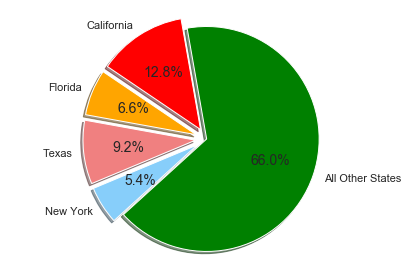

In [139]:
# Cleaning the DataFrame to show only the 50 US states, removing US territories and others
# Sorting the DataFrame by most cases to least cases
# Resetting the index and dropping original index column
cleaned_df = df.loc[df['State'].isin(state_names)].sort_values('Cases', ascending=False).reset_index().drop(columns='index')

# Plotting the top 5 most cases on a Pie chart
# Creating labels for Pie chart
labels = ['California', 'Florida', 'Texas', 'New York', 'All Other States']

# Defining the values for each category to be plotted
Ca=cleaned_df.loc[cleaned_df['State']=='California',['Cases']].sum()
Fl=cleaned_df.loc[cleaned_df['State']=='Florida',['Cases']].sum()
Tx=cleaned_df.loc[cleaned_df['State']=='Texas',['Cases']].sum()
Ny=cleaned_df.loc[cleaned_df['State']=='New York',['Cases']].sum()
Others=cleaned_df['Cases'].sum()-Ca-Fl-Tx-Ny

# Cleaning it up by combining it in a list
d = [Ca,Fl,Tx,Ny,Others]

# Defining the colors to be used for each category
colors = ['red', 'orange', 'lightcoral', 'lightskyblue', 'green']

# Creating a visual affect by extruding some of the slices
explode = (0.1,0.1,0.1,0.1,0)

# Creating the Pie chart based on the parameters defined above
plt.pie(d, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)

# Defining the axis of the pie chart to be equal
plt.axis('equal')

plt.tight_layout()
plt.savefig("Figures/Figure3.png")
plt.show()

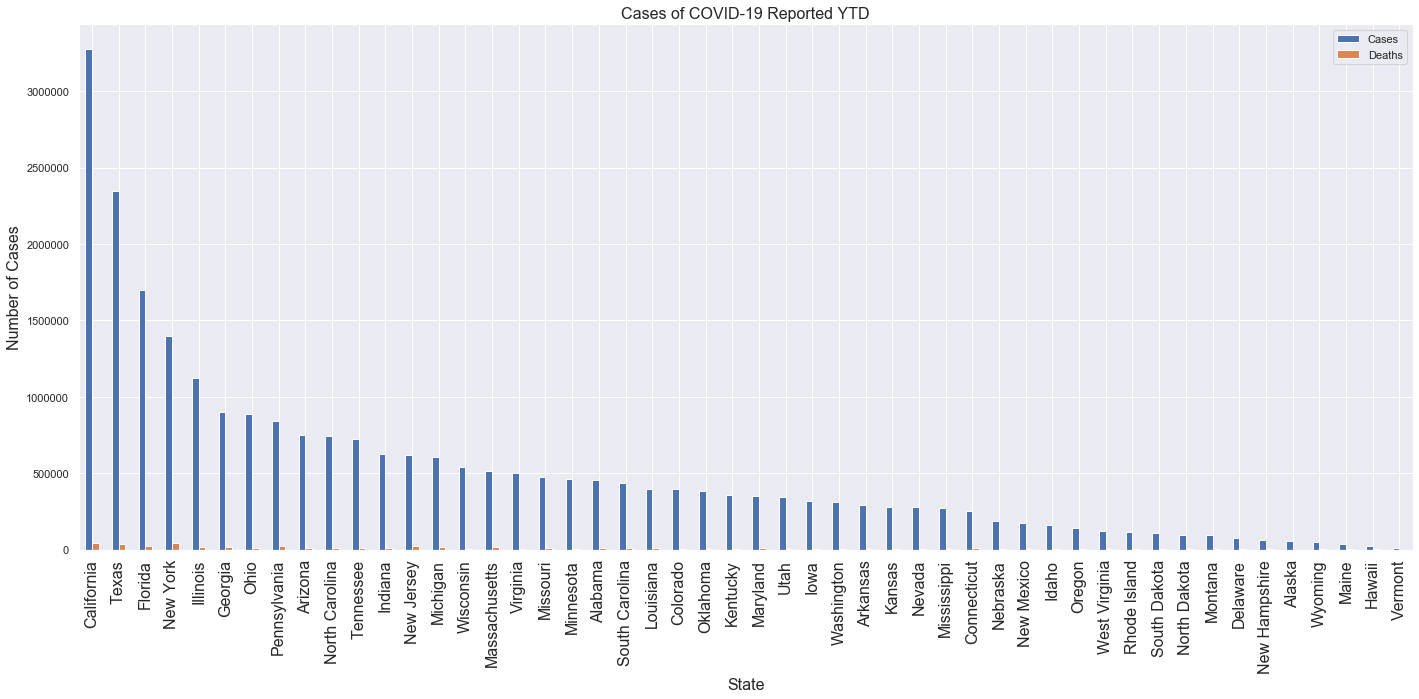

In [150]:
# Plot histogram
multi_plot = cleaned_df.plot(kind='bar',figsize=(20,10))
multi_plot.set_xticklabels(cleaned_df['State'],rotation=90, fontsize = '16')

plt.title("Cases of COVID-19 Reported YTD", fontsize = '16')
plt.xlabel("State", fontsize = '16')
plt.ylabel("Number of Cases", fontsize = '16')
plt.tight_layout()
plt.show()

## Impact of COVID on Stock Market

### Dow Jones, Nasdaq and SP500 During COVID

In [55]:
# Base URL for the API used
base_url = "https://finnhub.io/api/v1"

# Initializing lists for storing data
dow_ticker = []
dow_high = []
dow_high_date = []
dow_low = []
dow_low_date = []

# Looping through each stock in the pre-definied list (config.py)
# Not all the stocks in the list will be found on the API
# Therefore try and except
for stock in dow:
   
    try:
        query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
        r = requests.get(query_url).json()

        dow_high.append(round(r['metric']['52WeekHigh'],2))
        dow_high_date.append(r['metric']['52WeekHighDate'])
        dow_low.append(round(r['metric']['52WeekLow'],2))
        dow_low_date.append(r['metric']['52WeekLowDate'])
        dow_ticker.append(r['symbol'])
    
    except:
        pass

# Creating a Pandas DataFrame
dow_d = {
    "Dow Ticker Symbol" : dow_ticker,
    "Dow 52 Week High" : dow_high,
    "Dow 52 Week High Date" : dow_high_date,
    "Dow 52 Week Low" : dow_low,
    "Dow 52 Week Low Date" : dow_low_date
}

dow_df = pd.DataFrame(dow_d)

# Converting dates (obj) to date
dow_df['Dow 52 Week High Date'] = pd.to_datetime(dow_df['Dow 52 Week High Date'])
dow_df['Dow 52 Week Low Date'] = pd.to_datetime(dow_df['Dow 52 Week Low Date'])

# Sorting dates for easier plotting
high_sort = dow_df.sort_values(by='Dow 52 Week High Date')
high_dates = high_sort['Dow 52 Week High Date']
low_sort = dow_df.sort_values(by='Dow 52 Week Low Date')
low_dates = low_sort['Dow 52 Week Low Date']

In [74]:
# Using Yahoo finance to pull historical data on each of the 3 indices
# January 1, 2020 YTD
start = datetime(2020,1,1)
end = datetime(2021,1,29)
DJI = web.DataReader('^DJI', 'yahoo', start, end)
NDX = web.DataReader('^IXIC', 'yahoo', start, end)
SPX = web.DataReader('^GSPC', 'yahoo', start, end)

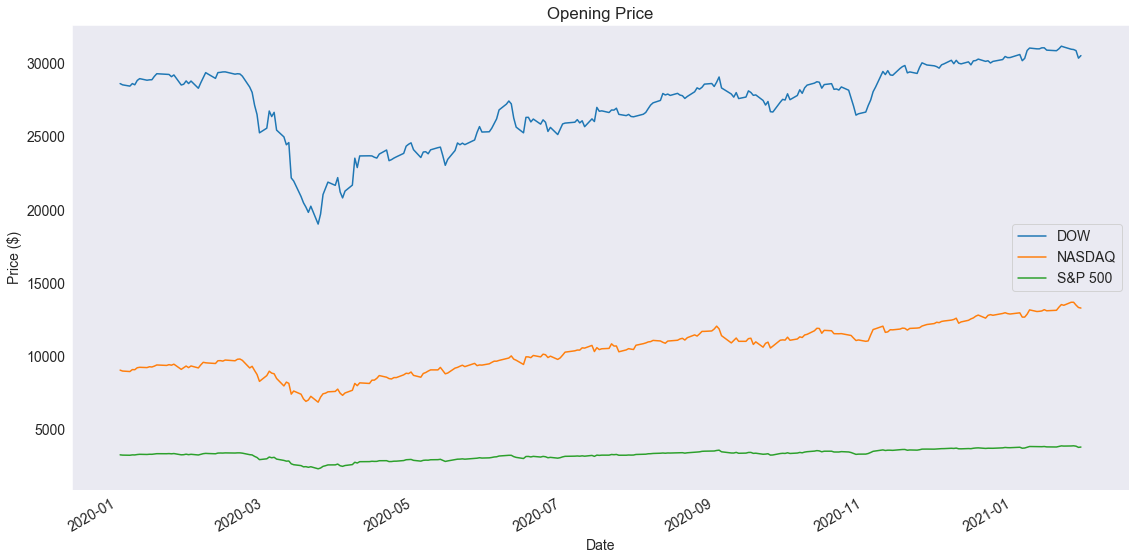

In [60]:
# Plotting the opening price for each index YTD
DJI['Open'].plot(label='DOW', figsize=(16,8), title='Opening Price')
NDX['Open'].plot(label='NASDAQ')
SPX['Open'].plot(label='S&P 500')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure5")
plt.show()

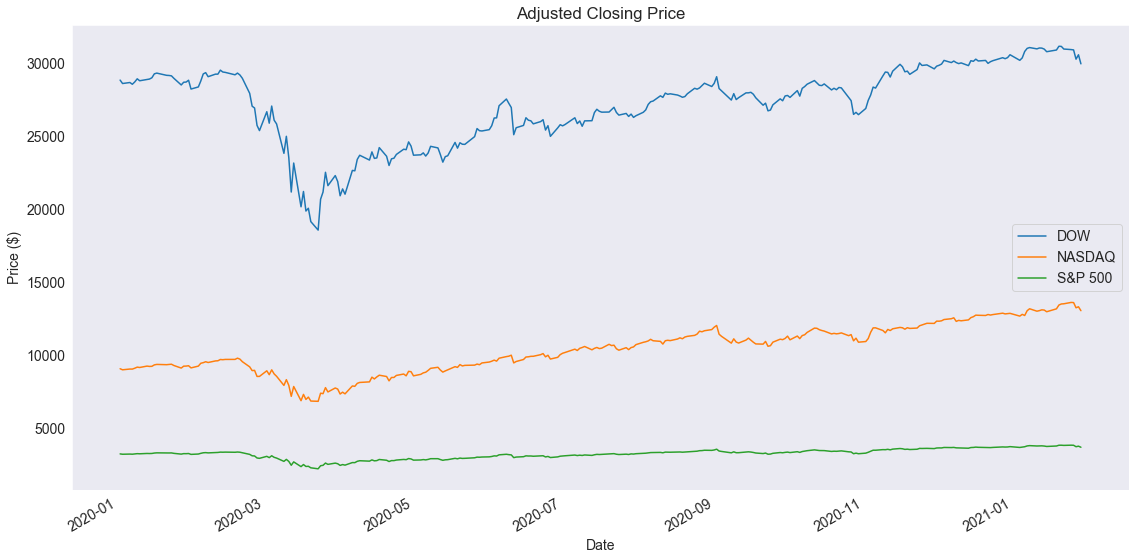

In [61]:
# Plotting the adjusted closing price for each index YTD
DJI['Adj Close'].plot(label='DOW', figsize=(16,8), title='Adjusted Closing Price')
NDX['Adj Close'].plot(label='NASDAQ')
SPX['Adj Close'].plot(label='S&P 500')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure6")
plt.show()

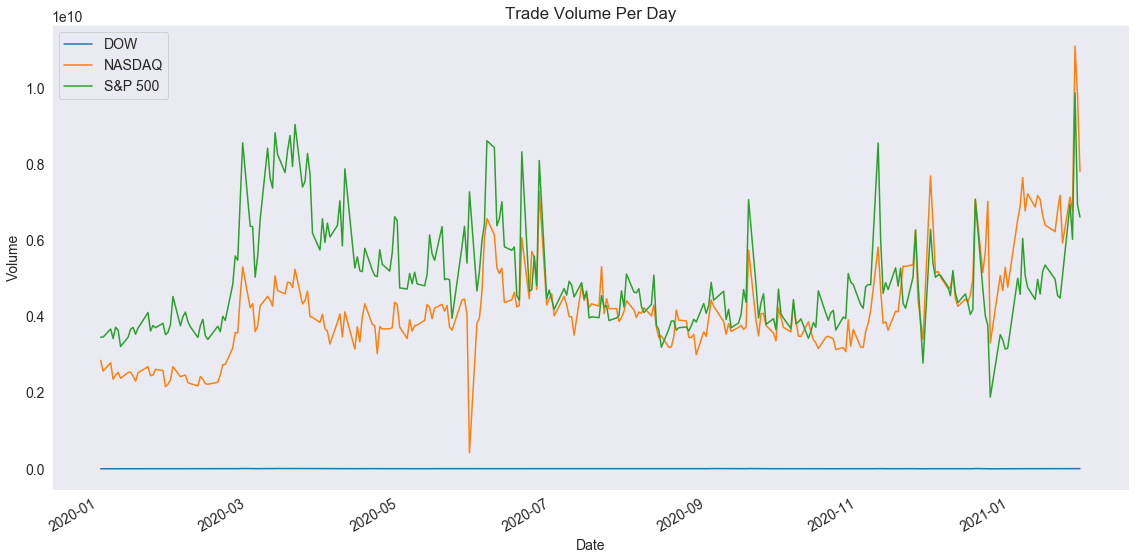

In [62]:
# Plotting trade volume per day for each index
DJI['Volume'].plot(label='DOW', figsize=(16,8), title='Trade Volume Per Day')
NDX['Volume'].plot(label='NASDAQ')
SPX['Volume'].plot(label='S&P 500')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure7")
plt.show()

In [63]:
# Finding the day with DOW's highest volume of trading 
DJI['Volume'].idxmax()

Timestamp('2020-02-28 00:00:00')

In [64]:
# Finding the day with NASDAQ's highest volume of trading 
NDX['Volume'].idxmax()

Timestamp('2021-01-27 00:00:00')

In [65]:
# Finding the day with S&P 500's highest volume of trading 
SPX['Volume'].idxmax()

Timestamp('2021-01-27 00:00:00')

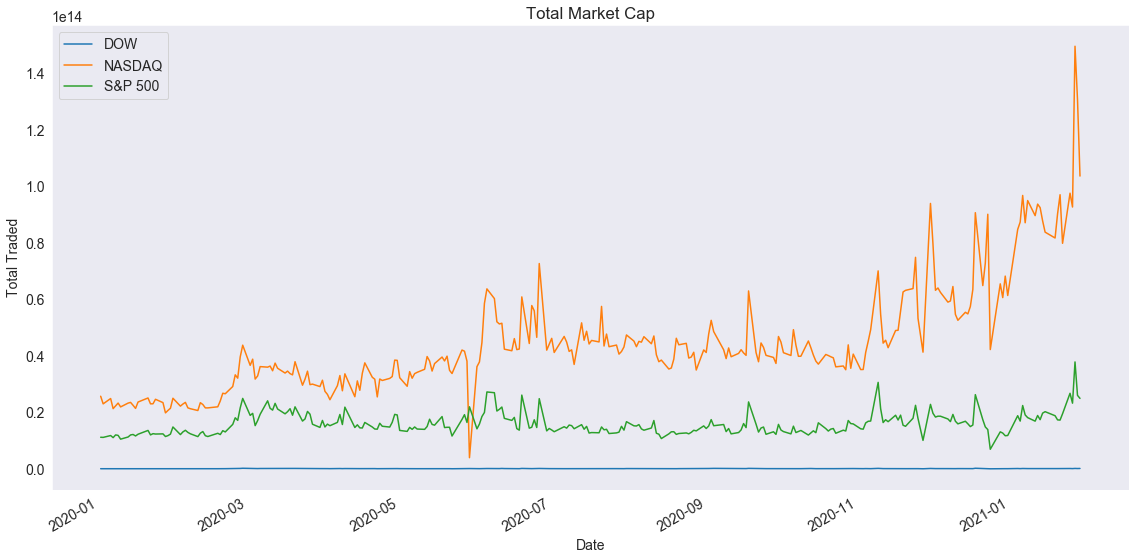

In [78]:
# To consider total market cap, not just the prices, multiplying the Volume by the Open price
# This isn't the actual Market Cap, it is a simple visual representation of money traded

DJI['Total Traded'] = DJI['Open'] * DJI['Volume']
NDX['Total Traded'] = NDX['Open'] * NDX['Volume']
SPX['Total Traded'] = SPX['Open'] * SPX['Volume']

DJI['Total Traded'].plot(label='DOW', figsize=(16,8), title="Total Market Cap")
NDX['Total Traded'].plot(label='NASDAQ')
SPX['Total Traded'].plot(label='S&P 500')
plt.ylabel('Total Traded')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure8")
plt.show()

In [67]:
# Date when max amount of money was traded. What happened on that day?
DJI['Total Traded'].idxmax()

Timestamp('2020-12-18 00:00:00')

In [68]:
# Date when max amount of money was traded. What happened on that day?
NDX['Total Traded'].idxmax()

Timestamp('2021-01-27 00:00:00')

In [69]:
# Date when max amount of money was traded. What happened on that day?
SPX['Total Traded'].idxmax()

Timestamp('2021-01-27 00:00:00')

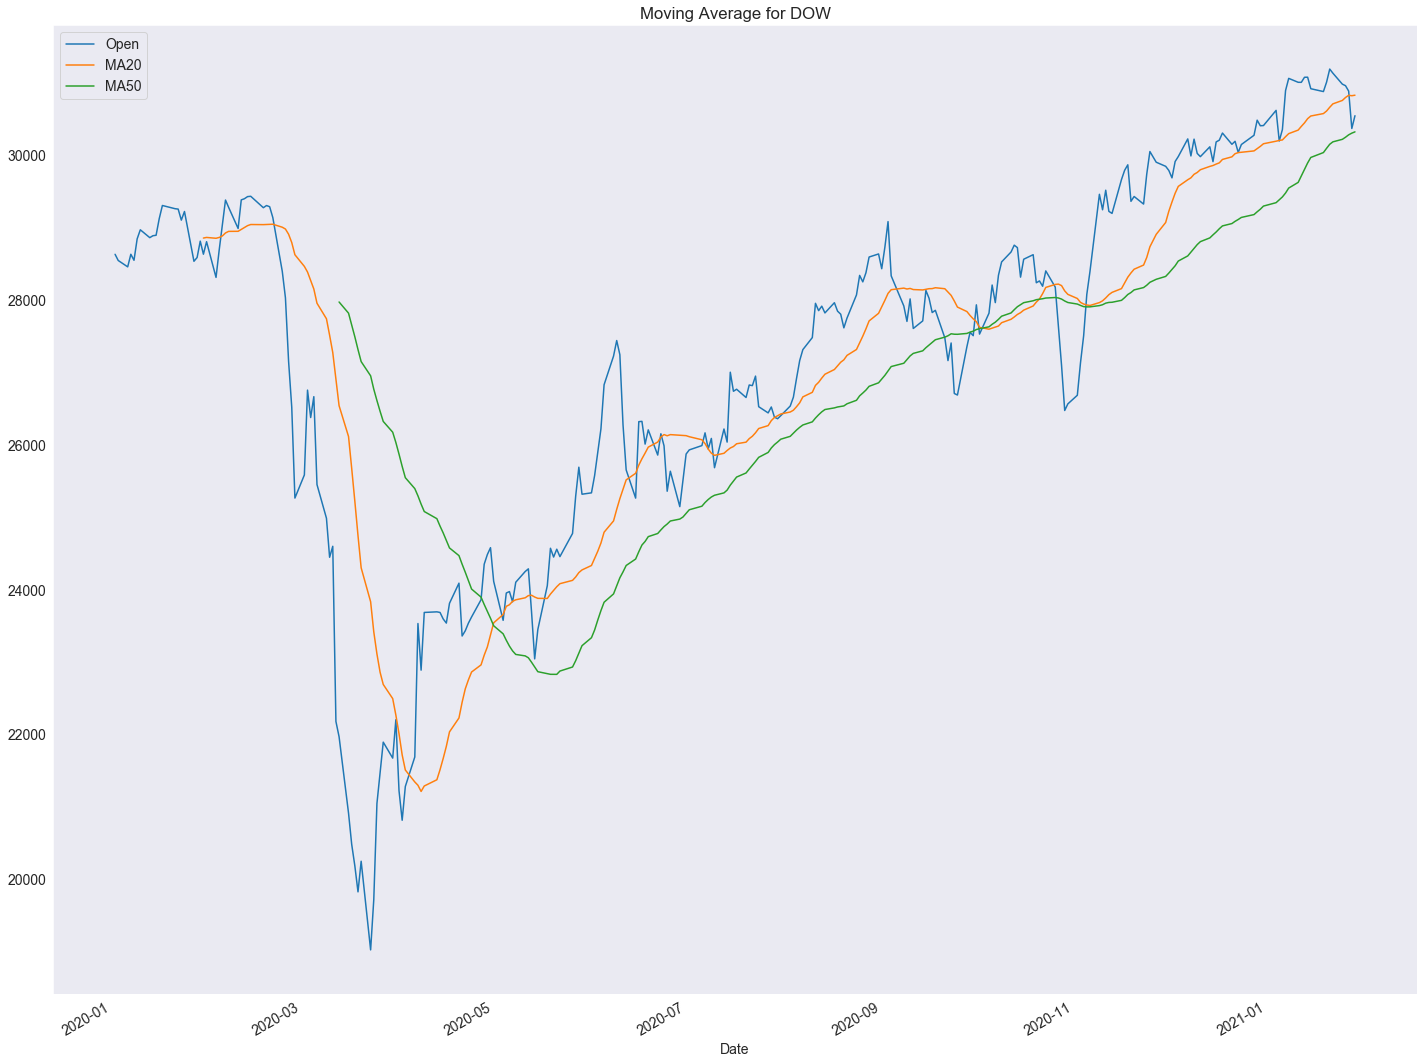

In [79]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for DOW

DJI['MA20'] = DJI['Open'].rolling(20).mean()
DJI['MA50'] = DJI['Open'].rolling(50).mean()
# DJI['MA100'] = DJI['Open'].rolling(100).mean()
DJI[['Open', 'MA20','MA50']].plot(label='DOW', figsize=(20,15), title="Moving Average for DOW")

plt.tight_layout()
plt.savefig("Figures/Figure9")
plt.show()

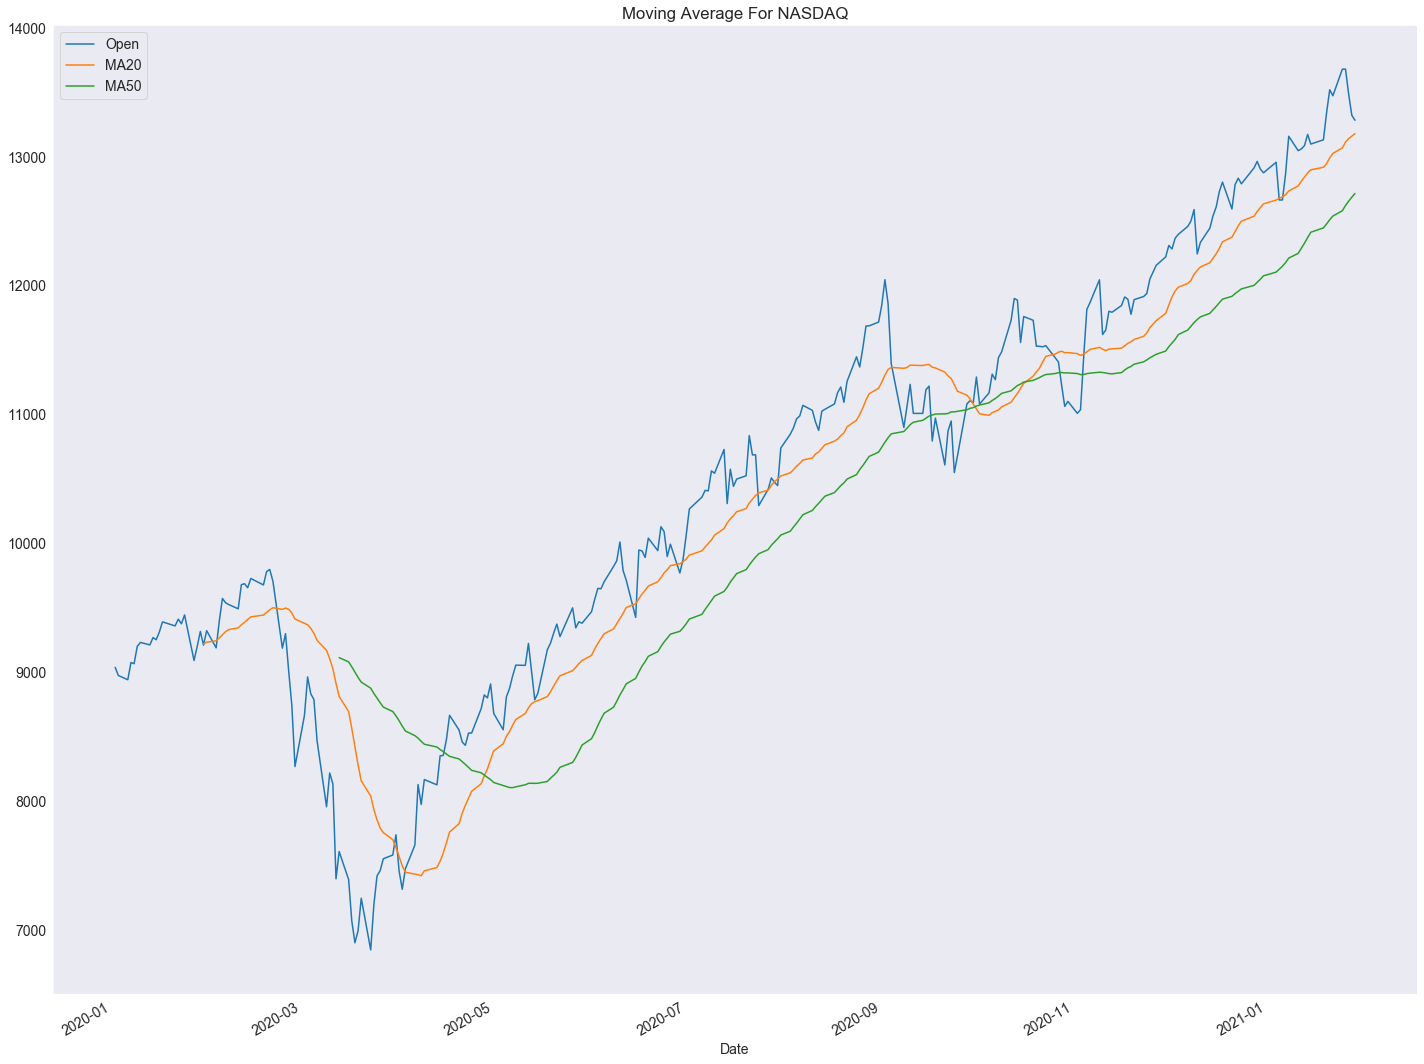

In [71]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for NASDAQ

NDX['MA20'] = NDX['Open'].rolling(20).mean()
NDX['MA50'] = NDX['Open'].rolling(50).mean()
# NDX['MA100'] = NDX['Open'].rolling(100).mean()
NDX[['Open', 'MA20','MA50']].plot(label='NASDAQ', figsize=(20,15), title="Moving Average For NASDAQ")

plt.tight_layout()
plt.savefig("Figures/Figure10")
plt.show()

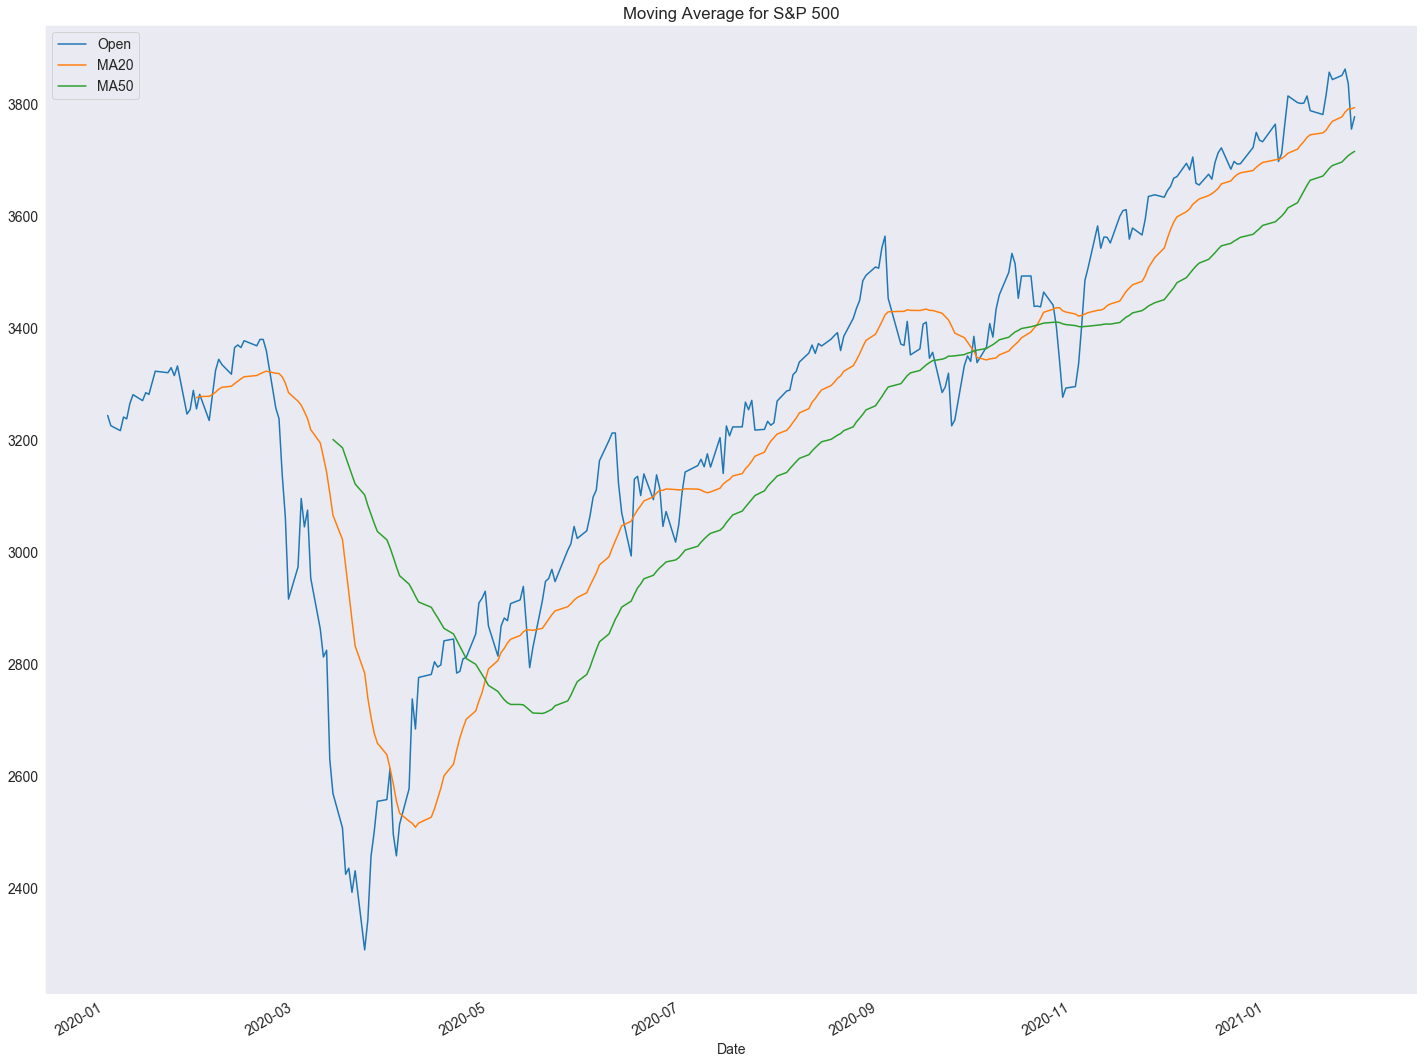

In [72]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for S&P 500

SPX['MA20'] = SPX['Open'].rolling(20).mean()
SPX['MA50'] = SPX['Open'].rolling(50).mean()
# SPX['MA100'] = SPX['Open'].rolling(100).mean()
SPX[['Open', 'MA20','MA50']].plot(label='S&P 500', figsize=(20,15), title="Moving Average for S&P 500")

plt.tight_layout()
plt.savefig("Figures/Figure11")
plt.show()

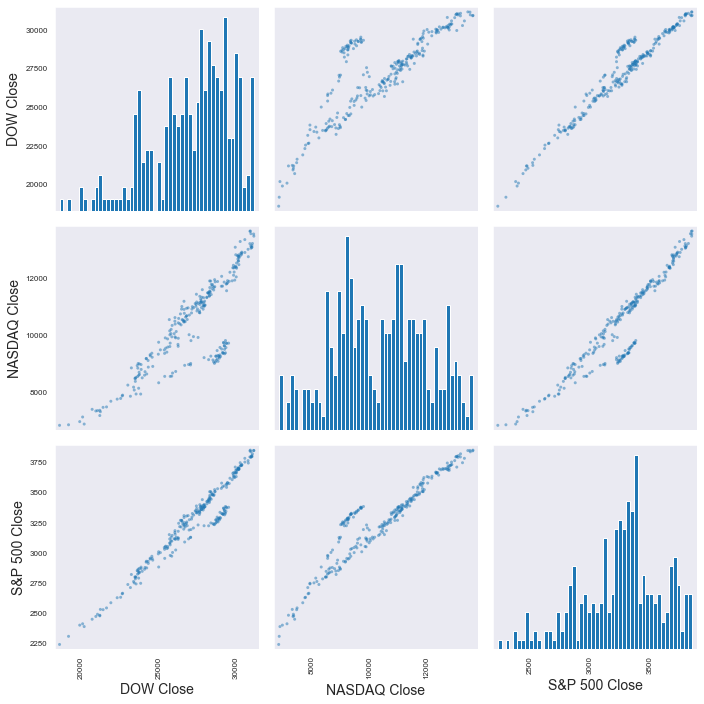

In [80]:
# Checking for a relationship between the 3 indices
index_comp = pd.concat([DJI['Close'], NDX['Close'], SPX['Close']], axis=1)
index_comp.columns=['DOW Close', 'NASDAQ Close', 'S&P 500 Close']

scatter_matrix(index_comp, figsize=(10,10), alpha=0.5, hist_kwds={'bins':50})
plt.tight_layout()
plt.savefig("Figures/Figure12")
plt.show()

In [84]:
# Creating a new df to use for candlesticks
# Resetting index
DJI_reset = DJI.reset_index()

# Adding a new column which converts the date to a number value
DJI_reset['date_ax'] = DJI_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
DJI_values = [tuple(vals) for vals in DJI_reset[list_cols].values]

# Formatting
mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

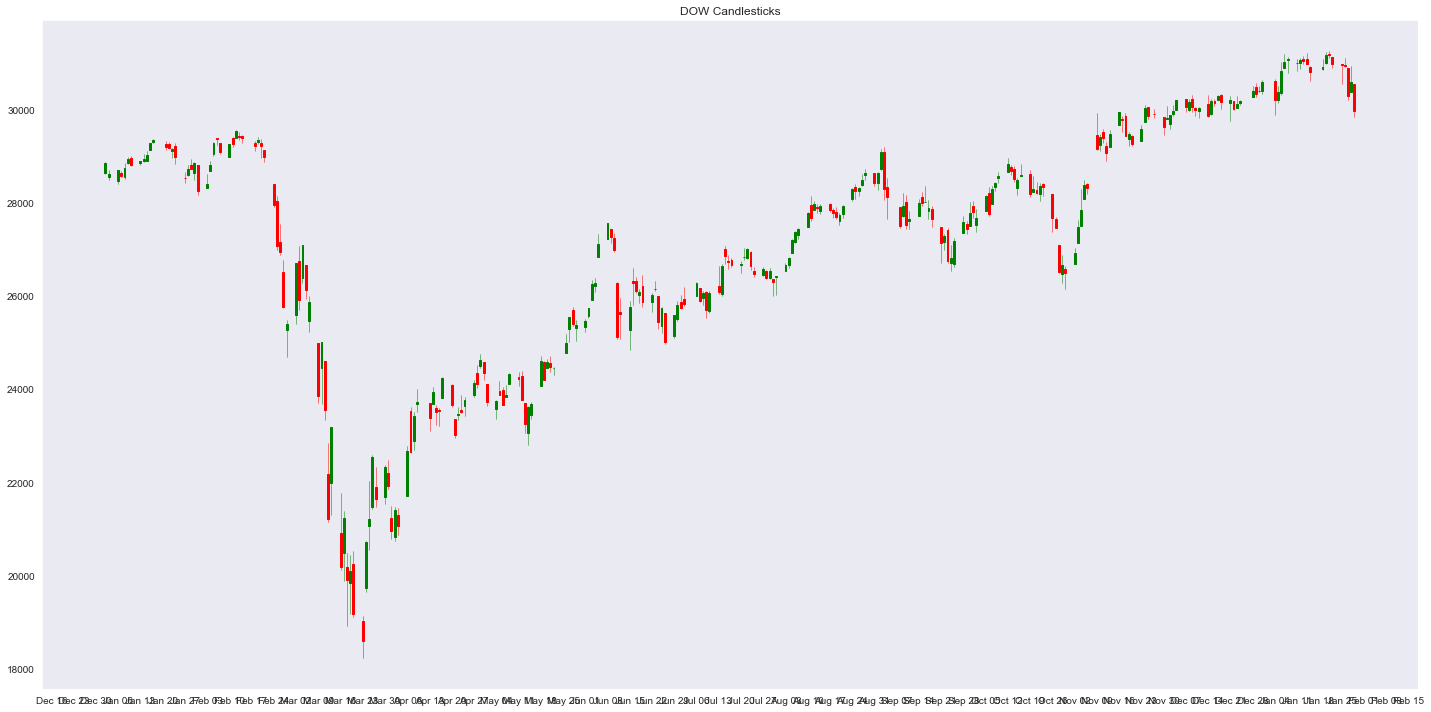

In [95]:
# Plotting candlestick chart of DOW
fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)
        
# Candlestick
candlestick_ohlc(ax, DJI_values, width=0.6, colorup='g', colordown='r')

plt.title("DOW Candlesticks")
plt.tight_layout()
plt.savefig("Figures/Figure13")
plt.show()

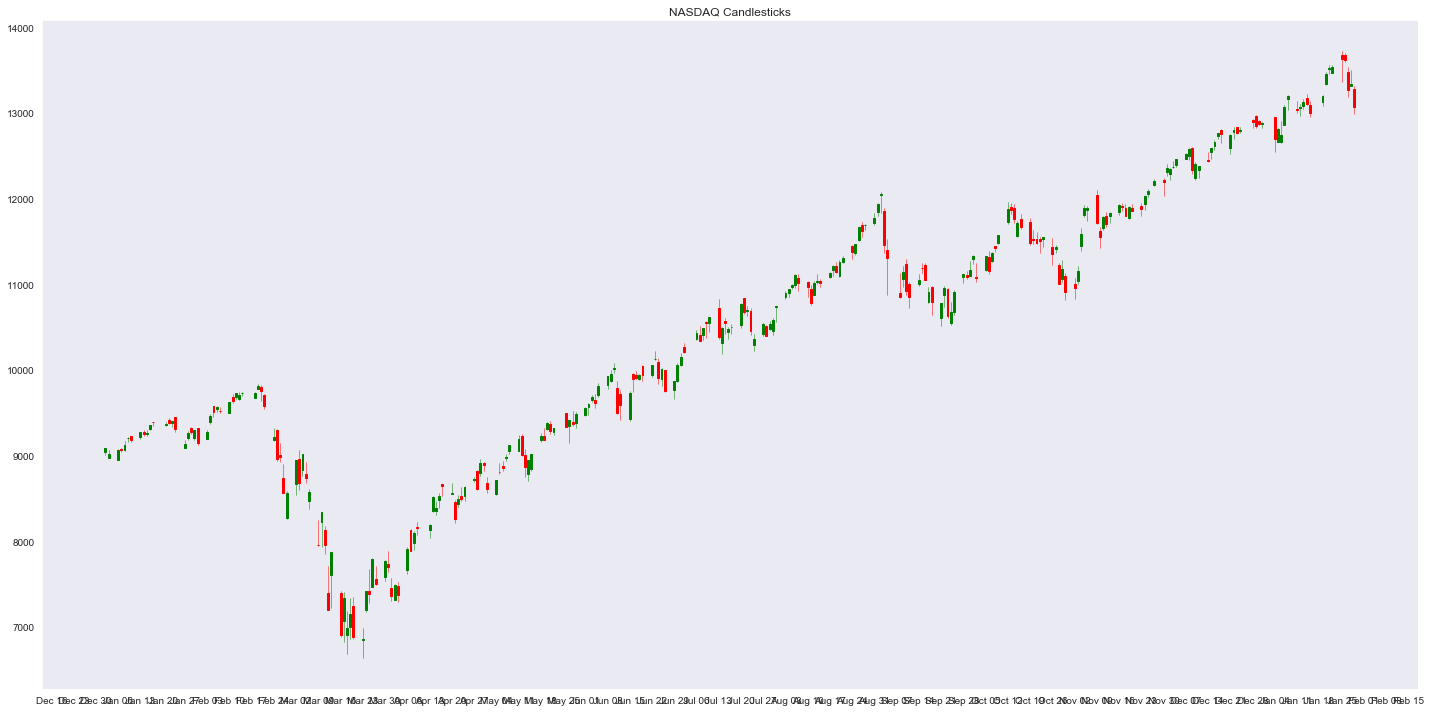

In [96]:
# Creating a new df to use for candlesticks
# Resetting index
NDX_reset = NDX.reset_index()

# Adding a new column which converts the date to a number value
NDX_reset['date_ax'] = NDX_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
NDX_values = [tuple(vals) for vals in NDX_reset[list_cols].values]

fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, NDX_values, width=0.6, colorup='g', colordown='r')
plt.title("NASDAQ Candlesticks")
plt.tight_layout()
plt.savefig("Figures/Figure14")
plt.show()

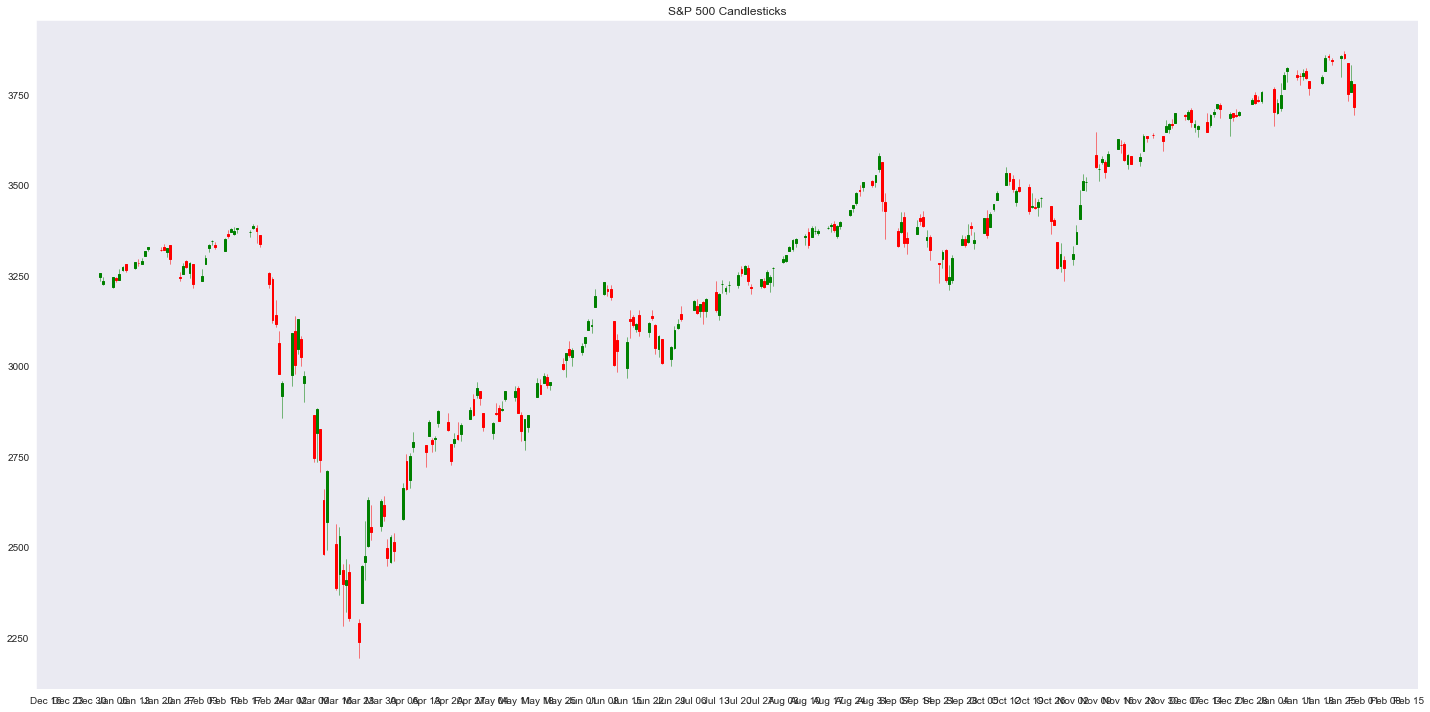

In [97]:
# Creating a new df to use for candlesticks
# Resetting index
SPX_reset = SPX.reset_index()

# Adding a new column which converts the date to a number value
SPX_reset['date_ax'] = SPX_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
SPX_values = [tuple(vals) for vals in SPX_reset[list_cols].values]

fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, SPX_values, width=0.6, colorup='g', colordown='r')
plt.title("S&P 500 Candlesticks")
plt.tight_layout()
plt.savefig("Figures/Figure15")
plt.show()

In [98]:
# Daily Percentage Change(rt)= (pt/(pt-1))-1
# Calculating the return from the Close price column
DJI['Returns'] = DJI['Close'].pct_change(1)
NDX['Returns'] = NDX['Close'].pct_change(1)
SPX['Returns'] = SPX['Close'].pct_change(1)
SPX.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,1.122088e+13,NaN
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,1.116737e+13,-0.007060
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,1.182150e+13,0.003533
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,1.108839e+13,-0.002803
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,1.205044e+13,0.004902


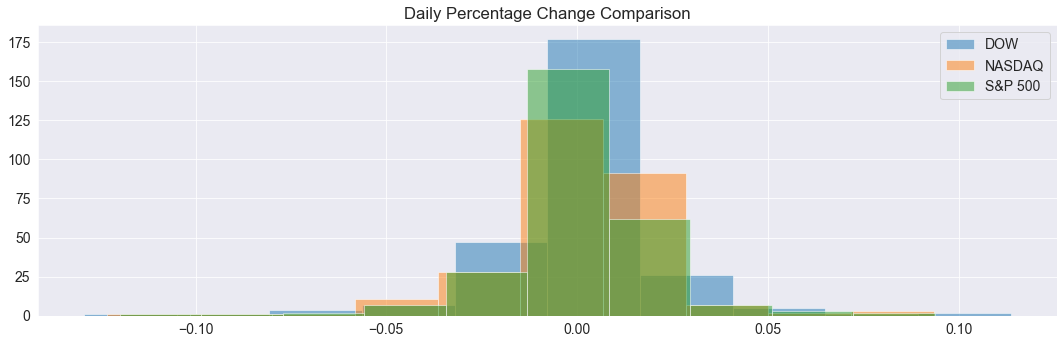

In [116]:
# Combined Daily Percentage Change histogram of all indices
DJI['Returns'].hist(bins=10, label='DOW', figsize=(15,5), alpha=0.5)
NDX['Returns'].hist(bins=10, label='NASDAQ', alpha=0.5)
SPX['Returns'].hist(bins=10, label='S&P 500', alpha=0.5)
plt.legend()
plt.title("Daily Percentage Change Comparison")
plt.tight_layout()
plt.savefig("Figures/Figure19")
plt.show()

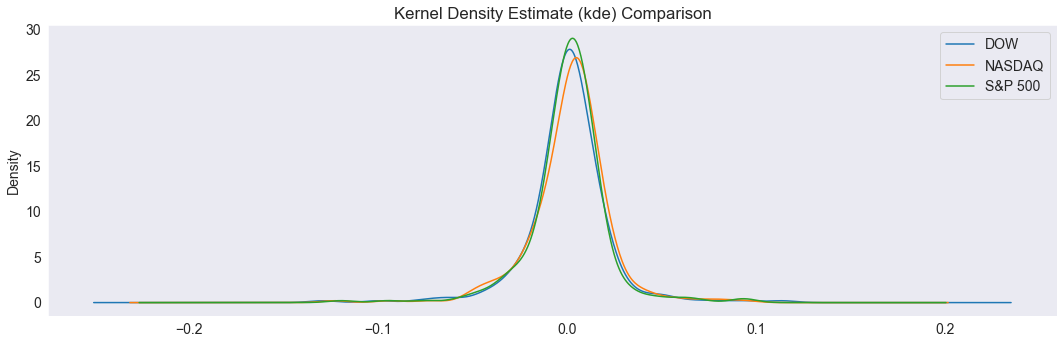

In [108]:
# Another visualization of the Daily Percentage Change for all indices
DJI['Returns'].plot(kind='kde', label='DOW', figsize=(15,5))
NDX['Returns'].plot(kind='kde', label='NASDAQ')
SPX['Returns'].plot(kind='kde', label='S&P 500')
plt.title("Kernel Density Estimate (kde) Comparison")
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure20")
plt.show()

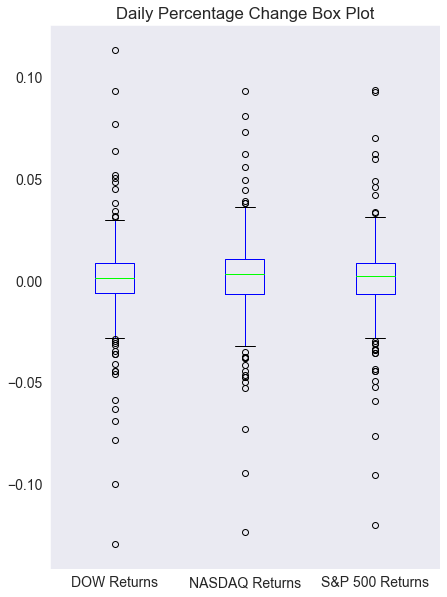

In [119]:
# Box plot of the Daily Percentage Change for all indices
box_df = pd.concat([DJI['Returns'],NDX['Returns'],SPX['Returns']], axis=1)
box_df.columns = ['DOW Returns', 'NASDAQ Returns', 'S&P 500 Returns']
box_df.plot(kind='box', figsize=(7,10), colormap='brg', title="Daily Percentage Change Box Plot")
plt.savefig("Figures/Figure21")
plt.show()

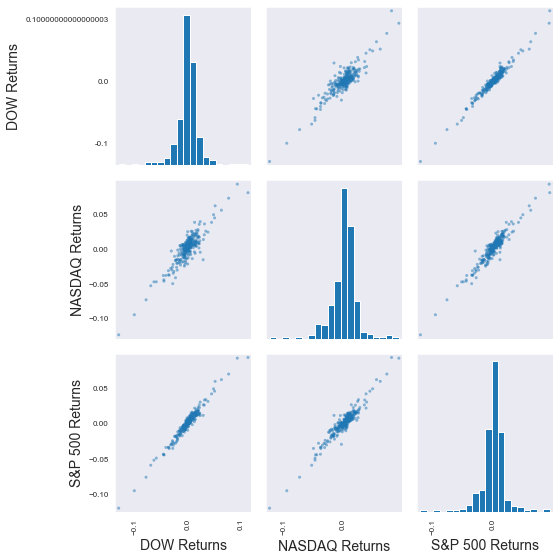

In [120]:
# Scatter plot to view relationship between 3 indices
scatter_matrix(box_df, figsize=(8,8), alpha=0.5, hist_kwds={'bins':20})
plt.tight_layout()
plt.show()

In [121]:
# Calculating Cumulative Daily Returns
# Cumulative Returns = (1+ pct_daily_returns).cumprod()

DJI['Cumulative Return'] = (1 + DJI['Returns']).cumprod()
NDX['Cumulative Return'] = (1 + NDX['Returns']).cumprod()
SPX['Cumulative Return'] = (1 + SPX['Returns']).cumprod()
DJI.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Returns,Cumulative Return
Date,,,,,,,,,,,
2020-01-02,28872.800781,28627.769531,28638.970703,28868.800781,2518200,28868.800781,7.211866e+10,NaN,NaN,NaN,NaN
2020-01-03,28716.310547,28500.359375,28553.330078,28634.880859,2395900,28634.880859,6.841092e+10,NaN,NaN,-0.008103,0.991897
2020-01-06,28708.019531,28418.630859,28465.500000,28703.380859,2527600,28703.380859,7.194940e+10,NaN,NaN,0.002392,0.994270
2020-01-07,28685.500000,28565.279297,28639.179688,28583.679688,2589000,28583.679688,7.414684e+10,NaN,NaN,-0.004170,0.990124
2020-01-08,28866.179688,28522.509766,28556.140625,28745.089844,2917500,28745.089844,8.331254e+10,NaN,NaN,0.005647,0.995715


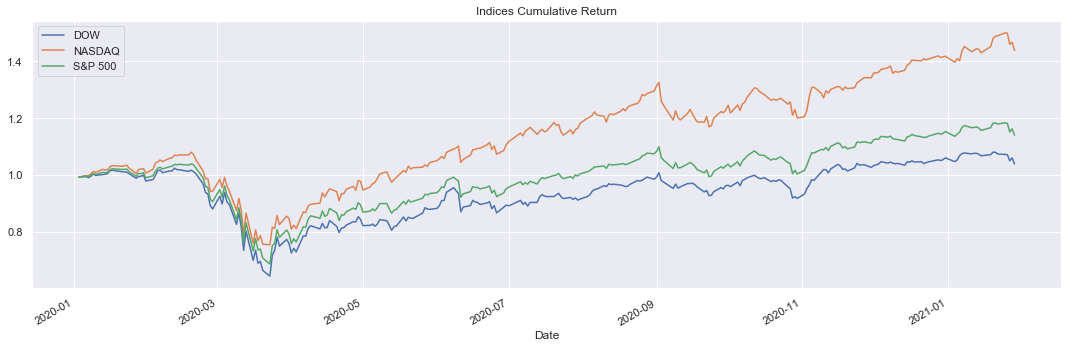

In [124]:
# Plotting Cumulative Return for all indices
DJI['Cumulative Return'].plot(label='DOW', figsize=(15,5), title='Indices Cumulative Return')
NDX['Cumulative Return'].plot(label='NASDAQ')
SPX['Cumulative Return'].plot(label='S&P 500')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure22")
plt.show()

### Dow Jones

The Dow represents 30 large cap stocks and its value is derived from the sigma of its stock prices divided by .152 (as of 2020). Since it only has 30 stocks, it is impacted more significantly by the performance of individual stocks with its top 10 stocks accounting for over 50% of the Dow’s value. 

In [171]:
# HTTP Request
base_url = "https://finnhub.io/api/v1"

# 30 stocks in the Dow Jones
dow = ['MSFT','AAPL','V','JPM','JNJ','WMT','PG','INTC','UNH','XOM','HD','DIS','KO','VZ','MRK',
      'PFE','CVX','CSCO','BA','MCD','NKE','IBM','UTX','AXP','MMM','GS','CAT', 'WBA','TRV']

In [172]:
# Dates
dow_high = []
dow_high_date = []
dow_low = []
dow_low_date = []

# Gather the 52 week high and low prices for Dow stock
for stock in dow:
    query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
    response = requests.get(query_url).json()
    
    dow_high.append(response['metric']['52WeekHigh'])
    dow_high_date.append(response['metric']['52WeekHighDate'])
    dow_low.append(response['metric']['52WeekLow'])
    dow_low_date.append(response['metric']['52WeekLowDate'])

In [176]:
# Format key value pairs in dictionary
dow_dict = {
    "Dow Ticker Symbol" : dow,
    "Dow 52 Week High" : dow_high,
    "Dow 52 Week High Date" : dow_high_date,
    "Dow 52 Week Low" : dow_low,
    "Dow 52 Week Low Date" : dow_low_date
}

# Create df with dictionary
dow_high_df = pd.DataFrame(dow_dict)

dow_high_df['Dow 52 Week High Date'] = pd.to_datetime(dow_high_df['Dow 52 Week High Date'])
dow_high_df['Dow 52 Week Low Date'] = pd.to_datetime(dow_high_df['Dow 52 Week Low Date'])

In [177]:
# Aggregate dates with count of stocks that had negative movements
dow_low_group = dow_high_df.groupby('Dow 52 Week Low Date').agg({'Dow Ticker Symbol': ["count","- ".join],
                                                                 "Dow 52 Week Low":["mean", "max", "min"]})
dow_ticker_low = dow_low_group['Dow Ticker Symbol']
dow_ticker_low = dow_ticker_low.rename(columns = {"count" :"Dow Low Count", "join" : "Dow Low Ticker Symbols"})
dow_ticker_low.head(3)

,Dow Low Count,Dow Low Ticker Symbols
Dow 52 Week Low Date,,
2020-03-12,1,CAT
2020-03-16,2,WMT- CSCO
2020-03-18,8,HD- DIS- BA- MCD- NKE- UTX- AXP- TRV


In [178]:
# Aggregate dates with count of stocks that had positive movements
dow_high_group = dow_high_df.groupby('Dow 52 Week High Date').agg({'Dow Ticker Symbol': ["count", "- ".join],
                                                                   "Dow 52 Week High":["mean", "max", "min"]})
dow_ticker_high = dow_high_group['Dow Ticker Symbol']
dow_ticker_high = dow_ticker_high.rename(columns = {"count" :"Dow High Count", "join" : "Dow High Ticker Symbols"})
dow_ticker_high.head(3)

,Dow High Count,Dow High Ticker Symbols
Dow 52 Week High Date,,
2020-01-17,1,MRK
2020-01-24,4,INTC- XOM- CVX- AXP
2020-01-27,1,MMM


In [20]:
# Get low and high count range for each date 
dow_high_low_df = pd.concat([dow_ticker_high, dow_ticker_low]).sort_index()
dow_high_low_df.head(3)

,Dow High Count,Dow High Ticker Symbols,Dow Low Count,Dow Low Ticker Symbols
2020-01-17,1.0,MRK,NaN,NaN
2020-01-24,4.0,INTC- XOM- CVX- AXP,NaN,NaN
2020-01-27,1.0,MMM,NaN,NaN


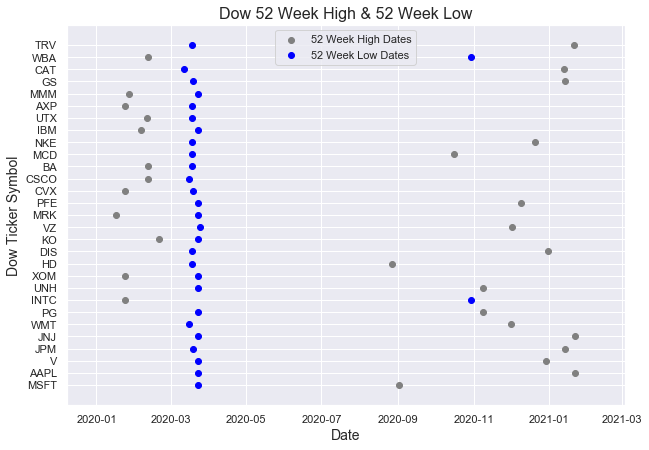

In [184]:
# Scatterplot
plt.figure(figsize=(10,7))

x_values = dow_high_df['Dow 52 Week High Date']
x_values1 = dow_high_df['Dow 52 Week Low Date']
y_values = dow_high_df['Dow Ticker Symbol']

plt.scatter(x_values,y_values, label = '52 Week High Dates', color = "grey")
plt.scatter(x_values1,y_values, label = '52 Week Low Dates', color = "blue")

plt.title("Dow 52 Week High & 52 Week Low", fontsize = '16')
plt.xlabel('Date', fontsize = '14')
plt.ylabel('Dow Ticker Symbol', fontsize = '14')

plt.legend(loc="best")

plt.savefig("Figures/Dow 52 Week High & 52 Week Low.jpg")
plt.rcParams.update({'font.size': 14})
plt.show()

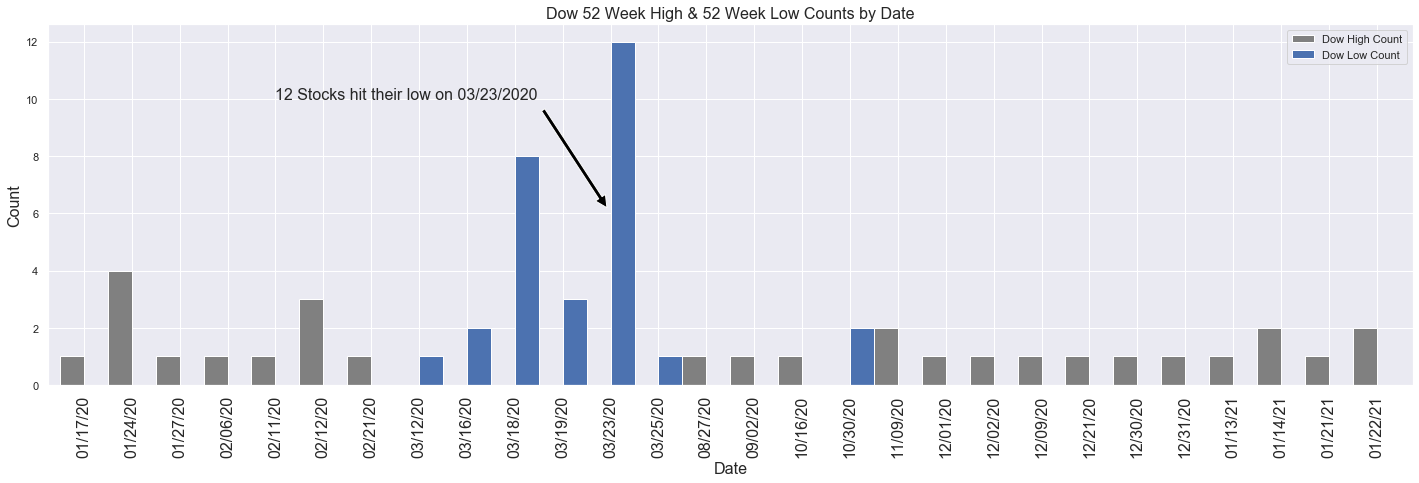

In [198]:
# Barchart
dow_yr_2020 = dow_high_low_df[(dow_high_low_df.index >='2020-01-01')]

multi_plot = dow_yr_2020[['Dow High Count', 'Dow Low Count']].plot(kind = 'bar' , width = 1, 
                                                                   figsize = (20,7), color = ['grey', 'b'])
multi_plot.set_xticklabels(dow_yr_2020.index.strftime("%x"), rotation = 90, fontsize = '16')

plt.title("Dow 52 Week High & 52 Week Low Counts by Date", fontsize = '16')
plt.xlabel('Date', fontsize = '16')
plt.ylabel('Count', fontsize = '16')

# Annotate
multi_plot.annotate('12 Stocks hit their low on 03/23/2020', xy=(11, 6), xytext=(4, 10),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig("Figures/Dow 52 Week High & 52 Week Low Counts by Date.jpg")
plt.rcParams.update({'font.size': 16})
plt.show()

### SP500

The S&P500 measures the stock performance of 500 large companies as measured by their market capitalization and a divisor (set by S&P). The companies with the greatest value of shares available to be traded are given the largest weighting with 10 of the largest companies accounting for about 28% of the market share.

In [202]:
# 24 S&P Stocks
sp500 = ['MSFT','AAPL','AMZN','FB','GOOGL','JNJ','JPM','V','PG','MA','INTC','UNH',
        'BAC','T','HD','XOM','DIS','VZ','KO','MRK','CMCSA','CVX','PEP','PFE']

In [203]:
# Dates
sp500_high = []
sp500_high_date = []
sp500_low = []
sp500_low_date = []

# Gather the 52 week high and low prices for SP500
for stock in sp500:
    query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
    response = requests.get(query_url).json()
    
    sp500_high.append(response['metric']['52WeekHigh'])
    sp500_high_date.append(response['metric']['52WeekHighDate'])
    sp500_low.append(response['metric']['52WeekLow'])
    sp500_low_date.append(response['metric']['52WeekLowDate'])

In [204]:
# Format key value pairs in dictionary
sp500_dict = {
    "SP500 Ticker Symbol" : sp500,
    "SP500 52 Week High" : sp500_high,
    "SP500 52 Week High Date" : sp500_high_date,
    "SP500 52 Week Low" : sp500_low,
    "SP500 52 Week Low Date" : sp500_low_date
}
# Create df with dictionary
sp500_high_df = pd.DataFrame(sp500_dict)

sp500_high_df['SP500 52 Week High Date'] = pd.to_datetime(sp500_high_df['SP500 52 Week High Date'])
sp500_high_df['SP500 52 Week Low Date'] = pd.to_datetime(sp500_high_df['SP500 52 Week Low Date'])

sp500_high_df.head(3)

,SP500 Ticker Symbol,SP500 52 Week High,SP500 52 Week High Date,SP500 52 Week Low,SP500 52 Week Low Date
0,MSFT,232.86,2020-09-02,132.5200,2020-03-23
1,AAPL,139.85,2021-01-22,53.1525,2020-03-23
2,AMZN,3552.25,2020-09-02,1626.0318,2020-03-16


In [205]:
# Aggregate dates with count of stocks that had negative movements
sp500_low_group = sp500_high_df.groupby('SP500 52 Week Low Date').agg({'SP500 Ticker Symbol': ["count","- ".join],
                                                                       "SP500 52 Week Low":["mean", "max", "min"]})
sp500_ticker_low = sp500_low_group['SP500 Ticker Symbol']
sp500_ticker_low = sp500_ticker_low.rename(columns = {"count" :"SP500 Low Count", "join" : "SP500 Low Ticker Symbols"})
sp500_ticker_low.head(3)

,SP500 Low Count,SP500 Low Ticker Symbols
SP500 52 Week Low Date,,
2020-03-16,1,AMZN
2020-03-18,3,FB- HD- DIS
2020-03-19,2,JPM- CVX


In [207]:
# Aggregate dates with count of stocks that had positive movements
sp500_high_group = sp500_high_df.groupby('SP500 52 Week High Date').agg({'SP500 Ticker Symbol': ["count", "- ".join],
                                                                         "SP500 52 Week High":["mean", "max", "min"]})
sp500_ticker_high = sp500_high_group['SP500 Ticker Symbol']
sp500_ticker_high = sp500_ticker_high.rename(columns = {"count" :"SP500 High Count", "join" : "SP500 High Ticker Symbols"})
sp500_ticker_high.head(3)

,SP500 High Count,SP500 High Ticker Symbols
SP500 52 Week High Date,,
2020-01-17,1,MRK
2020-01-24,3,INTC- XOM- CVX
2020-02-11,1,T


In [208]:
# Get low and high count range for each date
sp500_high_low_df = pd.concat([sp500_ticker_high, sp500_ticker_low]).sort_index()
sp500_high_low_df.head(3)

,SP500 High Count,SP500 High Ticker Symbols,SP500 Low Count,SP500 Low Ticker Symbols
2020-01-17,1.0,MRK,NaN,NaN
2020-01-24,3.0,INTC- XOM- CVX,NaN,NaN
2020-02-11,1.0,T,NaN,NaN


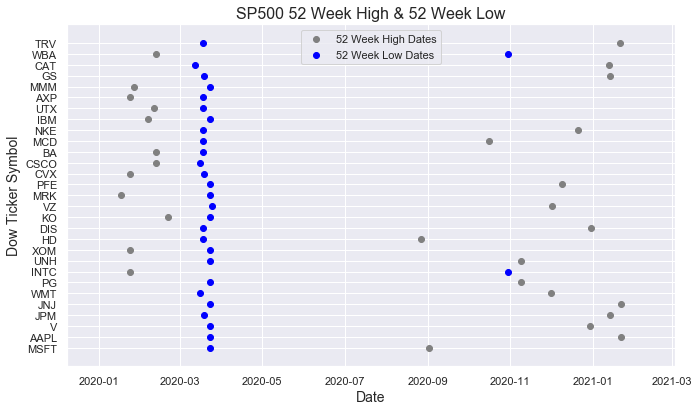

In [211]:
# Scatterplot
plt.figure(figsize=(10,6))

x_values = dow_high_df['Dow 52 Week High Date']
x_values1 = dow_high_df['Dow 52 Week Low Date']
y_values = dow_high_df['Dow Ticker Symbol']

plt.scatter(x_values,y_values, label = '52 Week High Dates', color = "grey")
plt.scatter(x_values1,y_values, label = '52 Week Low Dates', color = "blue")

plt.title("SP500 52 Week High & 52 Week Low", fontsize = '16')
plt.xlabel('Date', fontsize = '14')
plt.ylabel('Dow Ticker Symbol', fontsize = '14')

plt.legend(loc="best")
plt.tight_layout()

plt.savefig("Figures/SP500 52 Week High & 52 Week Low.jpg")
plt.rcParams.update({'font.size': 14})
plt.show()

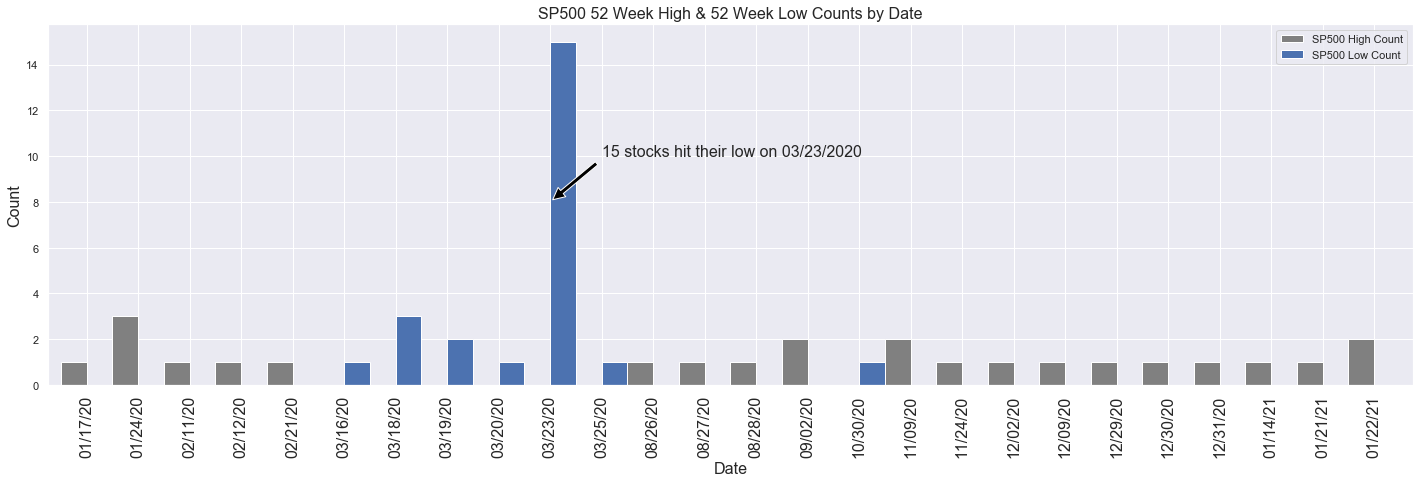

In [242]:
# Barchart
sp500_yr_2020 = sp500_high_low_df[(sp500_high_low_df.index >='2020-01-01')]

multi_plot = sp500_yr_2020[['SP500 High Count', 'SP500 Low Count']].plot(kind = 'bar' , width = 1, figsize = (20,7), color = ['grey', 'b'])
multi_plot.set_xticklabels(sp500_yr_2020.index.strftime("%x"), rotation = 90, fontsize = '16')

plt.title("SP500 52 Week High & 52 Week Low Counts by Date",fontsize = '16')
plt.xlabel('Date',fontsize = '16')
plt.ylabel('Count',fontsize = '16')

multi_plot.annotate('15 stocks hit their low on 03/23/2020', xy=(9, 8), xytext=(10, 10),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = '16')

plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.savefig("Figures/SP500 52 Week High & 52 Week Low Counts by Date.jpg")
plt.show()

### Nasdaq

The Nasdaq 100 is based on the market capitalization of its components. The top 10 stocks in the Nasdaq 100 account for over 50% of the index, making the index top-heavy and highly sensitive to price swings in a select few stocks. It is generally regarded as a technology index given the heavy weighting given to tech-based companies.

In [219]:
# 30 Nasdaq stocks
nasdaq = ['MSFT','AAPL','AMZN','GOOGL','FB','INTC','CSCO','CMCSA','PEP','ADBE','NVDA','NFLX',
         'PYPL','COST','AMGN','AVGO','TXN','CHTR','SBUX','QCOM','GILD','MDLZ','FISV','BKNG','INTU',
         'ADP','CME','TMUS','ISRG','MU']

In [220]:
# Dates
nasdaq_high = []
nasdaq_high_date = []
nasdaq_low = []
nasdaq_low_date = []

# Gather the 52 week high and low prices
for stock in nasdaq:
    query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
    response = requests.get(query_url).json()
    
    nasdaq_high.append(response['metric']['52WeekHigh'])
    nasdaq_high_date.append(response['metric']['52WeekHighDate'])
    nasdaq_low.append(response['metric']['52WeekLow'])
    nasdaq_low_date.append(response['metric']['52WeekLowDate'])

In [221]:
# Format key value pairs in dictionary
nasdaq_dict = {
    "Nasdaq Ticker Symbol" : nasdaq,
    "Nasdaq 52 Week High" : nasdaq_high,
    "Nasdaq 52 Week High Date" : nasdaq_high_date,
    "Nasdaq 52 Week Low" : nasdaq_low,
    "Nasdaq 52 Week Low Date" : nasdaq_low_date
}    
# Create df with dictionary  
nasdaq_high_df = pd.DataFrame(nasdaq_dict)

nasdaq_high_df['Nasdaq 52 Week High Date'] = pd.to_datetime(nasdaq_high_df['Nasdaq 52 Week High Date'])
nasdaq_high_df['Nasdaq 52 Week Low Date'] = pd.to_datetime(nasdaq_high_df['Nasdaq 52 Week Low Date'])

nasdaq_high_df.head(3)

,Nasdaq Ticker Symbol,Nasdaq 52 Week High,Nasdaq 52 Week High Date,Nasdaq 52 Week Low,Nasdaq 52 Week Low Date
0,MSFT,232.86,2020-09-02,132.5200,2020-03-23
1,AAPL,139.85,2021-01-22,53.1525,2020-03-23
2,AMZN,3552.25,2020-09-02,1626.0318,2020-03-16


In [222]:
# Aggregate dates with count of stocks that had negative movements
nasdaq_low_group = nasdaq_high_df.groupby('Nasdaq 52 Week Low Date').agg({'Nasdaq Ticker Symbol': ["count","- ".join],"Nasdaq 52 Week Low":["mean", "max", "min"]})
nasdaq_ticker_low = nasdaq_low_group['Nasdaq Ticker Symbol']
nasdaq_ticker_low = nasdaq_ticker_low.rename(columns = {"count" :"Nasdaq Low Count", "join" : "Nasdaq Low Ticker Symbols"})
nasdaq_ticker_low.head(3)

,Nasdaq Low Count,Nasdaq Low Ticker Symbols
Nasdaq 52 Week Low Date,,
2020-02-28,1,COST
2020-03-16,3,AMZN- CSCO- TXN
2020-03-17,1,NFLX


In [223]:
# Aggregate dates with count of stocks that had positive movements
nasdaq_high_group = nasdaq_high_df.groupby('Nasdaq 52 Week High Date').agg({'Nasdaq Ticker Symbol': ["count", "- ".join],"Nasdaq 52 Week High":["mean", "max", "min"]})
nasdaq_ticker_high = nasdaq_high_group['Nasdaq Ticker Symbol']
nasdaq_ticker_high = nasdaq_ticker_high.rename(columns = {"count" :"Nasdaq High Count", "join" : "Nasdaq High Ticker Symbols"})
nasdaq_ticker_high.head(3)

,Nasdaq High Count,Nasdaq High Ticker Symbols
Nasdaq 52 Week High Date,,
2020-01-24,1,INTC
2020-02-04,1,FISV
2020-02-12,1,CSCO


In [224]:
# Get low and high count range for each date 
nasdaq_high_low_df = pd.concat([nasdaq_ticker_high, nasdaq_ticker_low]).sort_index()
nasdaq_high_low_df.head(3)

,Nasdaq High Count,Nasdaq High Ticker Symbols,Nasdaq Low Count,Nasdaq Low Ticker Symbols
2020-01-24,1.0,INTC,NaN,NaN
2020-02-04,1.0,FISV,NaN,NaN
2020-02-12,1.0,CSCO,NaN,NaN


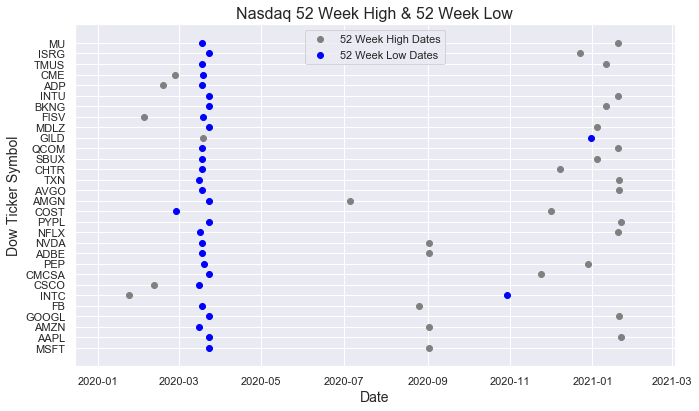

In [226]:
# Scatterplot
plt.figure(figsize=(10,6))

x_values = nasdaq_high_df['Nasdaq 52 Week High Date']
x_values1 = nasdaq_high_df['Nasdaq 52 Week Low Date']
y_values = nasdaq_high_df['Nasdaq Ticker Symbol']

plt.scatter(x_values,y_values, label = '52 Week High Dates', color = "grey")
plt.scatter(x_values1,y_values, label = '52 Week Low Dates', color = "blue")

plt.title("Nasdaq 52 Week High & 52 Week Low", fontsize = '16')
plt.xlabel('Date', fontsize = '14')
plt.ylabel('Dow Ticker Symbol', fontsize = '14')

plt.legend(loc="best")
plt.tight_layout()

plt.savefig("Figures/Nasdaq 52 Week High & 52 Week Low.jpg")
plt.rcParams.update({'font.size': 14})
plt.show()

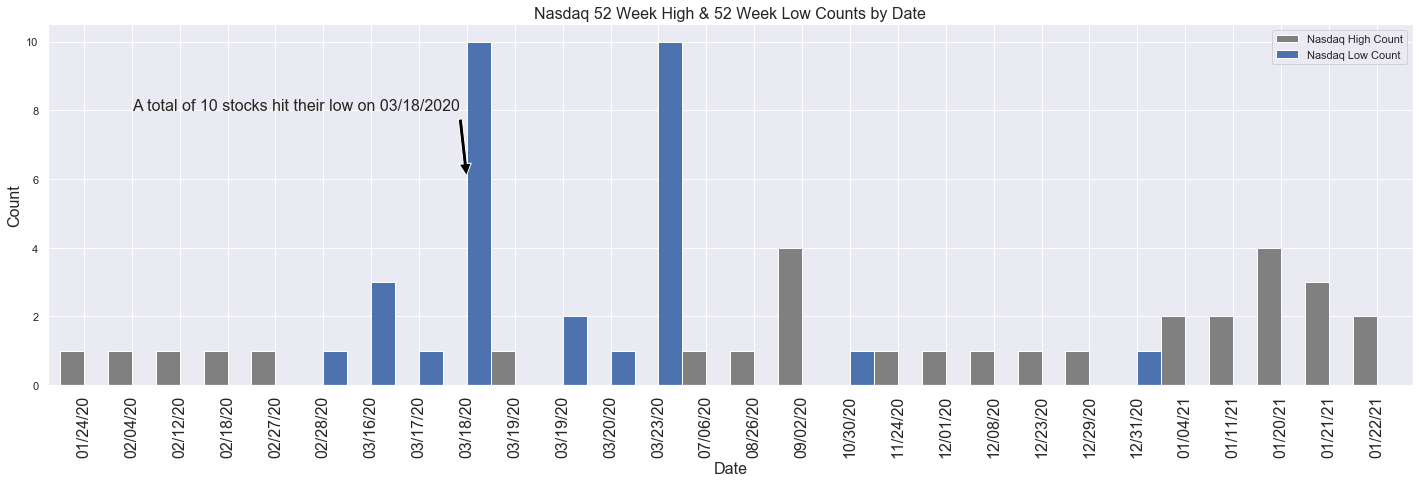

In [250]:
# Barchart
nasdaq_yr_2020 = nasdaq_high_low_df[(nasdaq_high_low_df.index >='2020-01-01')]

multi_plot = nasdaq_yr_2020[['Nasdaq High Count', 'Nasdaq Low Count']].plot(kind = 'bar' , width = 1, figsize = (20,7), 
                                                                            color = ['grey', 'b'])
multi_plot.set_xticklabels(nasdaq_yr_2020.index.strftime("%x"), rotation = 90, fontsize = '16')

plt.title("Nasdaq 52 Week High & 52 Week Low Counts by Date", fontsize = '16')
plt.xlabel('Date',fontsize = '16')
plt.ylabel('Count',fontsize = '16')

multi_plot.annotate('A total of 10 stocks hit their low on 03/18/2020', xy=(8, 6), xytext=(1, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig("Figures/Nasdaq 52 Week High & 52 Week Low Counts by Date.jpg")
plt.show()

### Stock Market since 1977

In [23]:
# Read historical market data since 1977
dow = pd.read_csv('Resources/DowJones.csv')
nasdaq = pd.read_csv('Resources/Nasdaq.csv')
sp500 = pd.read_csv('Resources/SP500.csv')
merged_df = pd.merge(dow,nasdaq, how='left', on='Date', suffixes=(' Dow', ' Nasdaq'))
merged_df = pd.merge(merged_df, sp500, how='left', on='Date')
merged_df.rename(columns={'Value': 'Value S&P 500'}, inplace=True)
merged_df.head(3)

,Date,Value Dow,Value Nasdaq,Value S&P 500
0,1977-09-02,872.31,100.83,97.45
1,1977-09-09,857.04,100.91,96.37
2,1977-09-16,856.81,100.74,96.48


In [24]:
merged_df.to_csv('Resources/merged.csv', index=False)

In [25]:
merged_df['Date']= pd.to_datetime(merged_df['Date'])
merged_df.dtypes

Date             datetime64[ns]
Value Dow               float64
Value Nasdaq            float64
Value S&P 500           float64
dtype: object

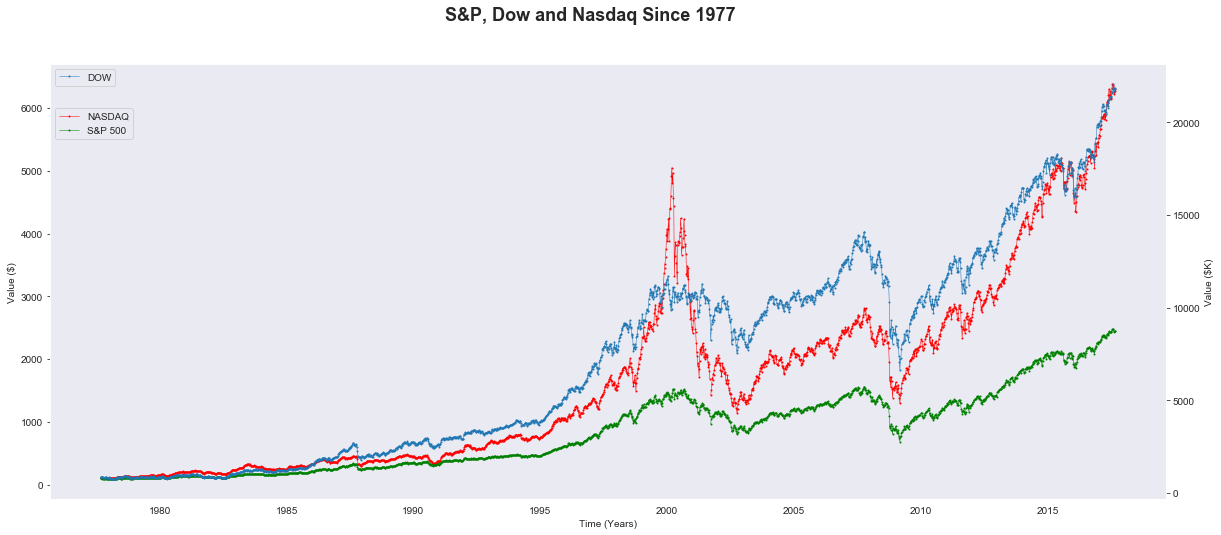

In [26]:
# Plot indices
sns.set_style('dark')

x_axis = merged_df['Date']

fig, ax1 = plt.subplots(figsize=(20,8))
fig.suptitle("S&P, Dow and Nasdaq Since 1977", fontsize=18, fontweight="bold")

ax1.plot(x_axis, merged_df['Value Nasdaq'], linewidth=0.5, marker="o", color="r", markersize=1, label='NASDAQ')

ax1.plot(x_axis, merged_df['Value S&P 500'], linewidth=0.5, marker="o", color="g", markersize=1, label='S&P 500')
ax1.set_ylabel("Value ($)")
ax1.set_xlabel("Time (Years)")
plt.legend(loc='upper left',bbox_to_anchor=(0,0.91))

ax2 = ax1.twinx()
ax2.plot(x_axis, merged_df['Value Dow'], linewidth=0.5, marker="o", markersize=1, label='DOW')
ax2.tick_params(axis='y')
ax2.set_ylabel("Value ($K)")

plt.legend(loc='upper left', bbox_to_anchor=(0,1))
plt.savefig('Figures/StocksSince1977')
plt.rcParams.update({'font.size': 18})

plt.show()

### Stock Market During Historical Pandemics

In [28]:
merged_df.tail()

,Date,Value Dow,Value Nasdaq,Value S&P 500
2077,2017-08-04,22092.81,6351.5600,2476.83
2078,2017-08-11,21858.32,6256.5600,2441.32
2079,2017-08-18,21674.51,6216.5300,2425.55
2080,2017-08-25,21813.67,6265.6400,2443.05
2081,2017-08-29,21865.37,6301.8857,2446.30


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

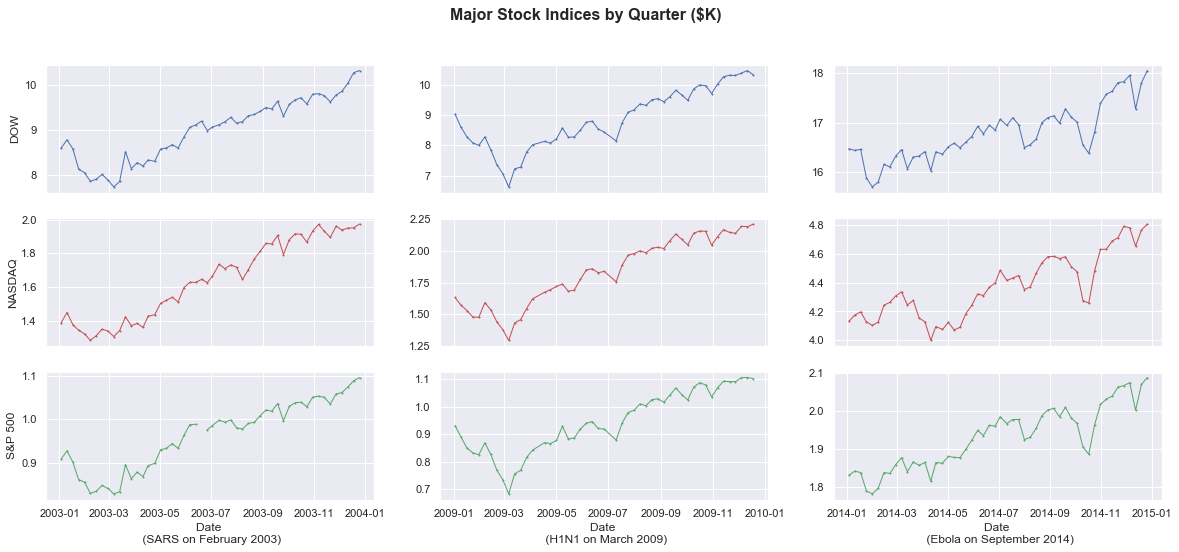

In [62]:
# SARS in 2003
# Swine Flu in 2009
# Ebola in 2014

sns.set(style='darkgrid')
plt.rcParams.update({'font.size': 16})

# Filter for 2003, 2009 and 2014, view by quarter
yr_2003 = merged_df.loc[(merged_df['Date']>='2003-01-01')&(merged_df['Date']<='2003-12-31')]
yr_2003['Quarter'] = yr_2003['Date'].dt.quarter

yr_2009 = merged_df.loc[(merged_df['Date']>='2009-01-01')&(merged_df['Date']<='2009-12-31')]
yr_2009['Quarter'] = yr_2009['Date'].dt.quarter

yr_2014 = merged_df.loc[(merged_df['Date']>='2014-01-01')&(merged_df['Date']<='2014-12-31')]
yr_2014['Quarter'] = yr_2014['Date'].dt.quarter

# Assign quarterly x_values to each plot
x_axis_2003 = yr_2003['Date']
x_axis_2009 = yr_2009['Date']
x_axis_2014 = yr_2014['Date']

# Create figure with 9 plots, 3 indices * 3 outbreaks
fig, (ax1, ax2, ax3) = plt.subplots(3,3, sharex='col', figsize=(20,8))
fig.suptitle("Major Stock Indices by Quarter ($K)", fontsize=16, fontweight="bold")

# SARS 
# April 2003
ax1[0].plot(x_axis_2003, yr_2003['Value Dow']/1000, linewidth=1, marker="o", markersize=1)
ax1[0].set_ylabel("DOW")

ax2[0].plot(x_axis_2003, yr_2003['Value Nasdaq']/1000, linewidth=1, marker="o", color="r", markersize=1)
ax2[0].set_ylabel("NASDAQ")

ax3[0].plot(x_axis_2003, yr_2003['Value S&P 500']/1000, linewidth=1, marker="o", color="g", markersize=1)
ax3[0].set_ylabel("S&P 500")
ax3[0].set_xlabel("Date \n (SARS on February 2003)")


# Swine Flu 
# April 2009 (Pandemic)
ax1[1].plot(x_axis_2009, yr_2009['Value Dow']/1000, linewidth=1, marker="o", markersize=1)
# ax1[1].set_ylabel("2009 DOW")

ax2[1].plot(x_axis_2009, yr_2009['Value Nasdaq']/1000, linewidth=1, marker="o", color="r", markersize=1)
# ax2[1].set_ylabel("2009 NASDAQ")

ax3[1].plot(x_axis_2009, yr_2009['Value S&P 500']/1000, linewidth=1, marker="o", color="g", markersize=1)
# ax3[1].set_ylabel("2009 S&P 500")
ax3[1].set_xlabel("Date \n (H1N1 on March 2009)")


# Ebola 
# March 2014
ax1[2].plot(x_axis_2014, yr_2014['Value Dow']/1000, linewidth=1, marker="o", markersize=1)
# ax1[2].set_ylabel("2014 DOW")

ax2[2].plot(x_axis_2014, yr_2014['Value Nasdaq']/1000, linewidth=1, marker="o", color="r", markersize=1)
# ax2[2].set_ylabel("2014 NASDAQ")

ax3[2].plot(x_axis_2014, yr_2014['Value S&P 500']/1000, linewidth=1, marker="o", color="g", markersize=1)
# ax3[2].set_ylabel("2014 S&P 500")
ax3[2].set_xlabel("Date \n (Ebola on September 2014)")

plt.savefig('Figures/PandemicComparison')
plt.show()

### Candlesticks

Below is a selection of one company to represent each of the mobility sectors. The hypothesis is that there is a correlation in the trends between these stocks's prices and their respective mobility sectors.

In [254]:
from datetime import datetime
import time
import random
import sys

#### Retail: Walmart (WMT)

In [2]:
# Lists for info to be requested
base_url = f'https://finnhub.io/api/v1'
opn = []
close = []
high = []
low = []
vol = []
time = []
dates = []

# Datetime range
start_date = datetime(2019,1,1,12,0,0)
start_date = int(datetime.timestamp(start_date))
end_date = datetime(2021,1,11,12,0,0)
end_date = int(datetime.timestamp(end_date))

# Request for stock info
stk = 'WMT'
query_url = f'{base_url}/stock/candle?symbol={stk}&resolution=D&from={start_date}&to={end_date}&token={Api_key}' 
response = requests.get(query_url).json()
opn = response['o']
close = response['c']
high = response['h']
low = response['l']
vol = response['v']
time = response['t']

# Insert dates
for i in time:
    date = datetime.fromtimestamp(i).date()
    dates.append(date)
    
# Pull data into dictionary 
d = {"Date": dates,
    "Open": opn,
    "Close": close,
    "Low": low,
    "High": high,
    "Volume": vol}

# Convert dictionary to dataframe
candles_df = pd.DataFrame(d)
candles_df.head(3)

,Date,Open,Close,Low,High,Volume
0,2019-01-01,91.64,93.34,91.64,93.65,8152733
1,2019-01-02,93.21,92.86,92.70,94.71,8277289
2,2019-01-03,93.21,93.44,92.69,93.66,8029144


In [4]:
# Candlesticks for Walmart (WMT) stock since 2019

# Note: This generates new browser tab with plot 

# Set plot dimensions
W_PLOT = 1250
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,box_zoom,hover,reset,save'
VBAR_WIDTH = 12*60*60*1000
RED = Category10[4][3]
GREEN = Category10[4][2]

# Pull above dataframe
stock = ColumnDataSource(data=candles_df)
stock.data = stock.from_df(candles_df)

# Gather daily price increase and decrease
p = figure(x_axis_type="datetime",plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
           title="Walmart (WMT)",toolbar_location='right')

inc = stock.data['Close'] > stock.data['Open']
dec = stock.data['Open'] > stock.data['Close']
view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

# Map dataframe indices to date strings and use as label overrides
p.xaxis.major_label_overrides = {i+int(stock.data['index'][0]): 
                                 date.strftime('%b %d') for i, date in enumerate(stock.data["Date"],1)}

p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_inc)
p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_dec)

p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=GREEN, line_color=GREEN,
       source=stock,view=view_inc, name="price")
p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
       source=stock,view=view_dec, name="price")

p.yaxis.formatter = NumeralTickFormatter(format='$ 0,0[.]000')
p.xaxis.axis_label = 'Time'
p.x_range.range_padding = 0.05
p.xaxis.ticker.desired_num_ticks = 50    
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# Select specific tool for the plot 
price_hover = p.select(dict(type=HoverTool))

# Choose which glyphs are active by glyph name
price_hover.names = ["price"]

# Create tooltips
price_hover.tooltips = [("Datetime", "@Date{%Y-%m-%d}"),
                        ("Open", "@Open{$0,0.00}"),
                        ("Close", "@Close{$0,0.00}"),
                       ("Volume", "@Volume{($ 0.00 a)}")]
price_hover.formatters={"Date": 'datetime'}

show(p)

#### Grocery & Pharmacy: Walgreens (WBA)

In [7]:
# Lists for info to be requested
base_url = f'https://finnhub.io/api/v1'
opn = []
close = []
high = []
low = []
vol = []
time = []
dates = []

# Datetime range
start_date = datetime(2019,1,1,12,0,0)
start_date = int(datetime.timestamp(start_date))
end_date = datetime(2021,1,11,12,0,0)
end_date = int(datetime.timestamp(end_date))

# Request for stock info
stk = 'WBA'
query_url = f'{base_url}/stock/candle?symbol={stk}&resolution=D&from={start_date}&to={end_date}&token={Api_key}' 
response = requests.get(query_url).json()
opn = response['o']
close = response['c']
high = response['h']
low = response['l']
vol = response['v']
time = response['t']

# Insert dates
for i in time:
    date = datetime.fromtimestamp(i).date()
    dates.append(date)
    
# Pull data into dictionary 
d = {"Date": dates,
    "Open": opn,
    "Close": close,
    "Low": low,
    "High": high,
    "Volume": vol}

# Convert dictionary to dataframe
candles_df = pd.DataFrame(d)
candles_df.head(3)

,Date,Open,Close,Low,High,Volume
0,2019-01-01,67.20,68.04,66.69,68.46,5528141
1,2019-01-02,67.80,67.33,66.72,68.09,5853235
2,2019-01-03,68.43,69.57,68.00,70.14,6868575


In [8]:
# Candlesticks for Walgreens (WBA) stock since 2019

# Note: This generates new browser tab with plot 

# Set plot dimensions
W_PLOT = 1250
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,box_zoom,hover,reset,save'
VBAR_WIDTH = 12*60*60*1000
RED = Category10[4][3]
GREEN = Category10[4][2]

# Pull above dataframe
stock = ColumnDataSource(data=candles_df)
stock.data = stock.from_df(candles_df)

# Gather daily price increase and decrease
p = figure(x_axis_type="datetime",plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
           title="Walgreens (WBA)",toolbar_location='right')

inc = stock.data['Close'] > stock.data['Open']
dec = stock.data['Open'] > stock.data['Close']
view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

# Map dataframe indices to date strings and use as label overrides
p.xaxis.major_label_overrides = {i+int(stock.data['index'][0]): 
                                 date.strftime('%b %d') for i, date in enumerate(stock.data["Date"],1)}

p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_inc)
p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_dec)

p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=GREEN, line_color=GREEN,
       source=stock,view=view_inc, name="price")
p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
       source=stock,view=view_dec, name="price")

p.yaxis.formatter = NumeralTickFormatter(format='$ 0,0[.]000')
p.xaxis.axis_label = 'Time'
p.x_range.range_padding = 0.05
p.xaxis.ticker.desired_num_ticks = 50    
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# Select specific tool for the plot 
price_hover = p.select(dict(type=HoverTool))

# Choose which glyphs are active by glyph name
price_hover.names = ["price"]

# Create tooltips
price_hover.tooltips = [("Datetime", "@Date{%Y-%m-%d}"),
                        ("Open", "@Open{$0,0.00}"),
                        ("Close", "@Close{$0,0.00}"),
                       ("Volume", "@Volume{($ 0.00 a)}")]
price_hover.formatters={"Date": 'datetime'}

show(p)

#### Parks: Vista Outdoor (VSTO)

In [9]:
# Lists for info to be requested
base_url = f'https://finnhub.io/api/v1'
opn = []
close = []
high = []
low = []
vol = []
time = []
dates = []

# Datetime range
start_date = datetime(2019,1,1,12,0,0)
start_date = int(datetime.timestamp(start_date))
end_date = datetime(2021,1,11,12,0,0)
end_date = int(datetime.timestamp(end_date))

# Request for stock info
stk = 'VSTO'
query_url = f'{base_url}/stock/candle?symbol={stk}&resolution=D&from={start_date}&to={end_date}&token={Api_key}' 
response = requests.get(query_url).json()
opn = response['o']
close = response['c']
high = response['h']
low = response['l']
vol = response['v']
time = response['t']

# Insert dates
for i in time:
    date = datetime.fromtimestamp(i).date()
    dates.append(date)
    
# Pull data into dictionary 
d = {"Date": dates,
    "Open": opn,
    "Close": close,
    "Low": low,
    "High": high,
    "Volume": vol}

# Convert dictionary to dataframe
candles_df = pd.DataFrame(d)
candles_df.head(3)

,Date,Open,Close,Low,High,Volume
0,2019-01-01,11.23,11.71,11.21,11.945,509000
1,2019-01-02,11.60,11.35,11.16,11.600,638619
2,2019-01-03,11.43,11.79,11.36,11.800,475542


In [12]:
# Candlesticks for Vista Outdoor (VSTO) stock since 2019

# Note: This generates new browser tab with plot 

# Set plot dimensions
W_PLOT = 1250
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,box_zoom,hover,reset,save'
VBAR_WIDTH = 12*60*60*1000
RED = Category10[4][3]
GREEN = Category10[4][2]

# Pull above dataframe
stock = ColumnDataSource(data=candles_df)
stock.data = stock.from_df(candles_df)

# Gather daily price increase and decrease
p = figure(x_axis_type="datetime",plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
           title="Vista Outdoor (VSTO)",toolbar_location='right')

inc = stock.data['Close'] > stock.data['Open']
dec = stock.data['Open'] > stock.data['Close']
view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

# Map dataframe indices to date strings and use as label overrides
p.xaxis.major_label_overrides = {i+int(stock.data['index'][0]): 
                                 date.strftime('%b %d') for i, date in enumerate(stock.data["Date"],1)}

p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_inc)
p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_dec)

p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=GREEN, line_color=GREEN,
       source=stock,view=view_inc, name="price")
p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
       source=stock,view=view_dec, name="price")

p.yaxis.formatter = NumeralTickFormatter(format='$ 0,0[.]000')
p.xaxis.axis_label = 'Time'
p.x_range.range_padding = 0.05
p.xaxis.ticker.desired_num_ticks = 50    
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# Select specific tool for the plot 
price_hover = p.select(dict(type=HoverTool))

# Choose which glyphs are active by glyph name
price_hover.names = ["price"]

# Create tooltips
price_hover.tooltips = [("Datetime", "@Date{%Y-%m-%d}"),
                        ("Open", "@Open{$0,0.00}"),
                        ("Close", "@Close{$0,0.00}"),
                       ("Volume", "@Volume{($ 0.00 a)}")]
price_hover.formatters={"Date": 'datetime'}

show(p)

#### Transit: Delta (DAL)

In [13]:
# Lists for info to be requested
base_url = f'https://finnhub.io/api/v1'
opn = []
close = []
high = []
low = []
vol = []
time = []
dates = []

# Datetime range
start_date = datetime(2019,1,1,12,0,0)
start_date = int(datetime.timestamp(start_date))
end_date = datetime(2021,1,11,12,0,0)
end_date = int(datetime.timestamp(end_date))

# Request for stock info
stk = 'DAL'
query_url = f'{base_url}/stock/candle?symbol={stk}&resolution=D&from={start_date}&to={end_date}&token={Api_key}' 
response = requests.get(query_url).json()
opn = response['o']
close = response['c']
high = response['h']
low = response['l']
vol = response['v']
time = response['t']

# Insert dates
for i in time:
    date = datetime.fromtimestamp(i).date()
    dates.append(date)
    
# Pull data into dictionary 
d = {"Date": dates,
    "Open": opn,
    "Close": close,
    "Low": low,
    "High": high,
    "Volume": vol}

# Convert dictionary to dataframe
candles_df = pd.DataFrame(d)
candles_df.head(3)

,Date,Open,Close,Low,High,Volume
0,2019-01-01,49.25,50.09,48.88,50.16,5270790
1,2019-01-02,48.51,45.61,45.08,48.94,18694053
2,2019-01-03,46.37,47.79,46.24,48.83,11037038


In [14]:
# Candlesticks for Delta (DAL) stock since 2019

# Note: This generates new browser tab with plot 

# Set plot dimensions
W_PLOT = 1250
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,box_zoom,hover,reset,save'
VBAR_WIDTH = 12*60*60*1000
RED = Category10[4][3]
GREEN = Category10[4][2]

# Pull above dataframe
stock = ColumnDataSource(data=candles_df)
stock.data = stock.from_df(candles_df)

# Gather daily price increase and decrease
p = figure(x_axis_type="datetime",plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
           title="Delta (DAL)",toolbar_location='right')

inc = stock.data['Close'] > stock.data['Open']
dec = stock.data['Open'] > stock.data['Close']
view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

# Map dataframe indices to date strings and use as label overrides
p.xaxis.major_label_overrides = {i+int(stock.data['index'][0]): 
                                 date.strftime('%b %d') for i, date in enumerate(stock.data["Date"],1)}

p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_inc)
p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_dec)

p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=GREEN, line_color=GREEN,
       source=stock,view=view_inc, name="price")
p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
       source=stock,view=view_dec, name="price")

p.yaxis.formatter = NumeralTickFormatter(format='$ 0,0[.]000')
p.xaxis.axis_label = 'Time'
p.x_range.range_padding = 0.05
p.xaxis.ticker.desired_num_ticks = 50    
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# Select specific tool for the plot
price_hover = p.select(dict(type=HoverTool))

# Choose which glyphs are active by glyph name
price_hover.names = ["price"]

# Create tooltips
price_hover.tooltips = [("Datetime", "@Date{%Y-%m-%d}"),
                        ("Open", "@Open{$0,0.00}"),
                        ("Close", "@Close{$0,0.00}"),
                       ("Volume", "@Volume{($ 0.00 a)}")]
price_hover.formatters={"Date": 'datetime'}

show(p)

#### Workplaces: SL Green Realty (SLG)

In [20]:
# Lists for info to be requested
base_url = f'https://finnhub.io/api/v1'
opn = []
close = []
high = []
low = []
vol = []
time = []
dates = []

# Datetime range
start_date = datetime(2019,1,1,12,0,0)
start_date = int(datetime.timestamp(start_date))
end_date = datetime(2021,1,11,12,0,0)
end_date = int(datetime.timestamp(end_date))

# Request for stock info
stk = 'SLG'
query_url = f'{base_url}/stock/candle?symbol={stk}&resolution=D&from={start_date}&to={end_date}&token={Api_key}' 
response = requests.get(query_url).json()
opn = response['o']
close = response['c']
high = response['h']
low = response['l']
vol = response['v']
time = response['t']

# Insert dates
for i in time:
    date = datetime.fromtimestamp(i).date()
    dates.append(date)
    
# Pull data into dictionary 
d = {"Date": dates,
    "Open": opn,
    "Close": close,
    "Low": low,
    "High": high,
    "Volume": vol}

# Convert dictionary to dataframe
candles_df = pd.DataFrame(d)
candles_df.head(3)

,Date,Open,Close,Low,High,Volume
0,2019-01-01,76.0947,75.6183,74.8600,76.3086,743560
1,2019-01-02,75.2003,75.3072,75.0788,77.0524,614837
2,2019-01-03,76.4350,77.1739,75.5794,78.3600,671078


In [19]:
# Candlesticks for SL Green Realty (SLG) stock since 2019

# Note: This generates new browser tab with plot 

# Set plot dimensions
W_PLOT = 1250
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,box_zoom,hover,reset,save'
VBAR_WIDTH = 12*60*60*1000
RED = Category10[4][3]
GREEN = Category10[4][2]

# Pull above dataframe
stock = ColumnDataSource(data=candles_df)
stock.data = stock.from_df(candles_df)

# Gather daily price increase and decrease
p = figure(x_axis_type="datetime",plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
           title="SL Green Realty (SLG)",toolbar_location='right')

inc = stock.data['Close'] > stock.data['Open']
dec = stock.data['Open'] > stock.data['Close']
view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

# Map dataframe indices to date strings and use as label overrides
p.xaxis.major_label_overrides = {i+int(stock.data['index'][0]): 
                                 date.strftime('%b %d') for i, date in enumerate(stock.data["Date"],1)}

p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_inc)
p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_dec)

p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=GREEN, line_color=GREEN,
       source=stock,view=view_inc, name="price")
p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
       source=stock,view=view_dec, name="price")

p.yaxis.formatter = NumeralTickFormatter(format='$ 0,0[.]000')
p.xaxis.axis_label = 'Time'
p.x_range.range_padding = 0.05
p.xaxis.ticker.desired_num_ticks = 50    
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# Select specific tool for the plot
price_hover = p.select(dict(type=HoverTool))

# Choose which glyphs are active by glyph name
price_hover.names = ["price"]

# Create tooltips
price_hover.tooltips = [("Datetime", "@Date{%Y-%m-%d}"),
                        ("Open", "@Open{$0,0.00}"),
                        ("Close", "@Close{$0,0.00}"),
                       ("Volume", "@Volume{($ 0.00 a)}")]
price_hover.formatters={"Date": 'datetime'}

show(p)

#### Residential: Amazon (AMZN)

In [255]:
# Lists for info to be requested
base_url = f'https://finnhub.io/api/v1'
opn = []
close = []
high = []
low = []
vol = []
time = []
dates = []

# Datetime range
start_date = datetime(2019,1,1,12,0,0)
start_date = int(datetime.timestamp(start_date))
end_date = datetime(2021,1,11,12,0,0)
end_date = int(datetime.timestamp(end_date))

# Request for stock info
stk = 'AMZN'
query_url = f'{base_url}/stock/candle?symbol={stk}&resolution=D&from={start_date}&to={end_date}&token={Api_key}' 
response = requests.get(query_url).json()
opn = response['o']
close = response['c']
high = response['h']
low = response['l']
vol = response['v']
time = response['t']

# Insert dates
for i in time:
    date = datetime.fromtimestamp(i).date()
    dates.append(date)
    
# Pull data into dictionary 
d = {"Date": dates,
    "Open": opn,
    "Close": close,
    "Low": low,
    "High": high,
    "Volume": vol}

# Convert dictionary to dataframe
candles_df = pd.DataFrame(d)
candles_df.head(3)

,Date,Open,Close,Low,High,Volume
0,2019-01-01,1465.20,1539.13,1460.9300,1553.36,7983103
1,2019-01-02,1520.01,1500.28,1497.1100,1538.00,6975572
2,2019-01-03,1530.00,1575.39,1518.3101,1594.00,9182575


In [256]:
# Candlesticks for Amazon (AMZN) stock since 2019

# Note: This generates new browser tab with plot 

# Set plot dimensions
W_PLOT = 1250
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,box_zoom,hover,reset,save'
VBAR_WIDTH = 12*60*60*1000
RED = Category10[4][3]
GREEN = Category10[4][2]

# Pull above dataframe
stock = ColumnDataSource(data=candles_df)
stock.data = stock.from_df(candles_df)

# Gather daily price increase and decrease
p = figure(x_axis_type="datetime",plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
           title="Amazon (AMZN)",toolbar_location='right')

inc = stock.data['Close'] > stock.data['Open']
dec = stock.data['Open'] > stock.data['Close']
view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

# Map dataframe indices to date strings and use as label overrides
p.xaxis.major_label_overrides = {i+int(stock.data['index'][0]): 
                                 date.strftime('%b %d') for i, date in enumerate(stock.data["Date"],1)}

p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_inc)
p.segment(x0='Date', x1='Date', y0='Low', y1='High', color='black', source=stock, view=view_dec)

p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=GREEN, line_color=GREEN,
       source=stock,view=view_inc, name="price")
p.vbar(x='Date', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
       source=stock,view=view_dec, name="price")

p.yaxis.formatter = NumeralTickFormatter(format='$ 0,0[.]000')
p.xaxis.axis_label = 'Time'
p.x_range.range_padding = 0.05
p.xaxis.ticker.desired_num_ticks = 50    
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# Select specific tool for the plot
price_hover = p.select(dict(type=HoverTool))

# Choose which glyphs are active by glyph name
price_hover.names = ["price"]

# Create tooltips
price_hover.tooltips = [("Datetime", "@Date{%Y-%m-%d}"),
                        ("Open", "@Open{$0,0.00}"),
                        ("Close", "@Close{$0,0.00}"),
                       ("Volume", "@Volume{($ 0.00 a)}")]
price_hover.formatters={"Date": 'datetime'}

show(p)

# Google Mobility Analysis

In [214]:
# Save S&P500 data 2/15/20 - 1/11/21
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 3, 1)
sp500 = web.DataReader(['sp500'], 'fred', start, end).to_csv('sp500.csv')

In [215]:
# Nasdaq
"""import datetime, quandl

ndq = quandl.get("NASDAQOMX/COMP-NASDAQ", 
              trim_start='2020-01-01', 
              trim_end='2021-03-01')

ndq.to_csv('ndq.csv')
ndq = pd.read_csv('ndq.csv')
ndq.head(0)"""

'import datetime, quandl\n\nndq = quandl.get("NASDAQOMX/COMP-NASDAQ", \n              trim_start=\'2020-01-01\', \n              trim_end=\'2021-03-01\')\n\nndq.to_csv(\'ndq.csv\')\nndq = pd.read_csv(\'ndq.csv\')\nndq.head(0)'

In [216]:
# ndq = ndq.drop(columns = ['High','Low', 'Total Market Value', 'Dividend Market Value'])
# ndq = ndq.set_index('Trade Date')

In [217]:
# Read bigquery data
data = pd.read_csv('covid_mobility.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [218]:
# Covid Data Exploration
data.columns
columns = list(data.columns)
mobility = columns[7:]
print (mobility)

['date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']


In [219]:
# Subset of US data
data.shape

(833093, 14)

In [220]:
# Number of subregions/states in the data
regions = data.sub_region_1.value_counts().index.tolist()
len(regions)

51

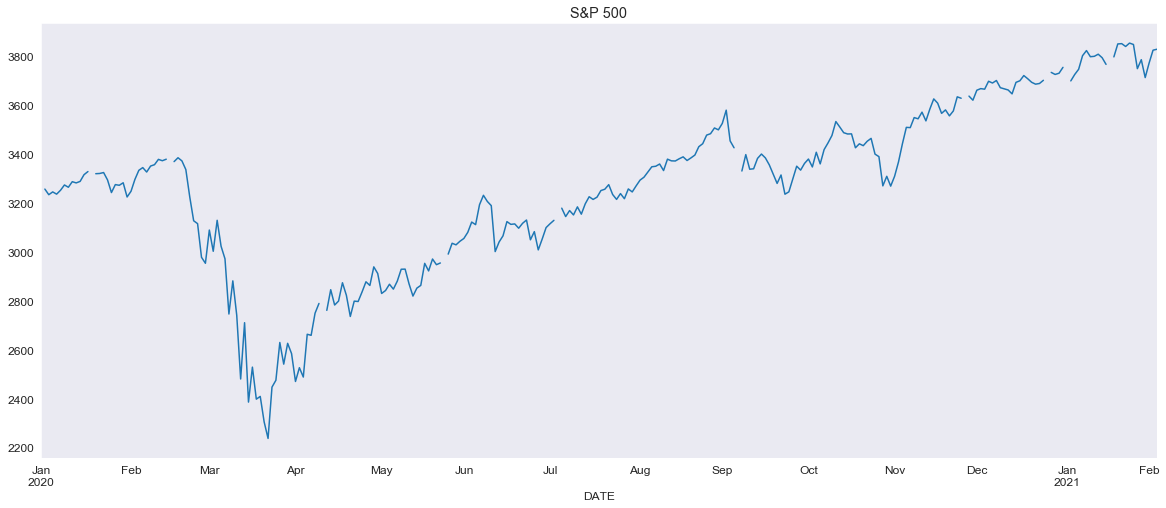

In [221]:
# Plot S&P500 using datareader
sp500 = web.DataReader(['sp500'], 'fred', start, end)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20, 8))
sp500['sp500'].plot(title='S&P 500')

In [222]:
# Calc daily return
sp500['daily_return'] = (sp500['sp500']/ sp500['sp500'].shift(1)) -1

In [223]:
# Drop nulls
sp500.dropna(inplace = True)

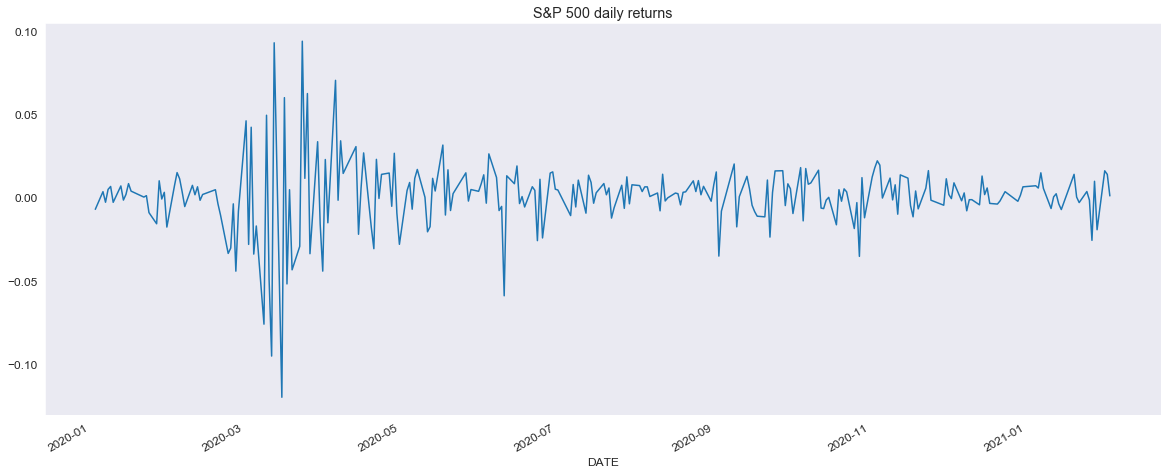

In [224]:
# Plot S&P500 returns
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20, 8))
sp500['daily_return'].plot(title='S&P 500 daily returns')

In [225]:
# Read df
sp500=pd.read_csv('sp500.csv')
sp500.head(0)

,DATE,sp500


In [226]:
# Convert all date columns to datetime 
data['date']=pd.to_datetime(data['date'])
sp500['DATE']=pd.to_datetime(sp500['DATE'])

In [227]:
# Join frames
df = pd.merge(data, sp500, left_on = 'date', right_on = 'DATE', how = 'left')
# df = data.set_index('date').join(sp500.set_index('DATE'))

In [228]:
# Align dates from both frames
df = df[df.date != '2020-02-15']
df = df[df.date != '2020-02-16']
df = df[df.date != '2020-02-17']
df.head(1)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,DATE,sp500
3,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0,2020-02-18,3370.29


In [229]:
# Drop irrelevant columns
df.drop(columns = ['metro_area','DATE', 'sub_region_2', 'iso_3166_2_code', 'census_fips_code', 'country_region_code', 
                   'country_region'], axis = 1, inplace = True)

In [230]:
# Remove null values in s&p500 and state
df = df[df.sp500.notna()]
df = df[df.sub_region_1.notna()]

In [231]:
# View count of null values 
df.isna().sum()

sub_region_1                                               0
date                                                       0
retail_and_recreation_percent_change_from_baseline    228451
grocery_and_pharmacy_percent_change_from_baseline     254825
parks_percent_change_from_baseline                    475425
transit_stations_percent_change_from_baseline         385228
workplaces_percent_change_from_baseline                10489
residential_percent_change_from_baseline              261033
sp500                                                      0
dtype: int64

In [232]:
# Isolate mobility and stock columns 
var = df.iloc[:,2:]
list(var.columns)

['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'sp500']

In [233]:
# Extract month into column 
df['date']=pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month
df.columns

Index(['sub_region_1', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'sp500', 'month'],
      dtype='object')

In [234]:
# Fill any null values in monthly state mobility data with mean
df['retail_and_recreation_percent_change_from_baseline']= df.groupby(['sub_region_1', 'month'])['retail_and_recreation_percent_change_from_baseline'].transform(lambda x: x.fillna(x.mean()))
df['grocery_and_pharmacy_percent_change_from_baseline']= df.groupby(['sub_region_1', 'month'])['grocery_and_pharmacy_percent_change_from_baseline'].transform(lambda x: x.fillna(x.mean()))
df['parks_percent_change_from_baseline']= df.groupby(['sub_region_1', 'month'])['parks_percent_change_from_baseline'].transform(lambda x: x.fillna(x.mean()))
df['transit_stations_percent_change_from_baseline']= df.groupby(['sub_region_1', 'month'])['transit_stations_percent_change_from_baseline'].transform(lambda x: x.fillna(x.mean()))
df['workplaces_percent_change_from_baseline']= df.groupby(['sub_region_1', 'month'])['workplaces_percent_change_from_baseline'].transform(lambda x: x.fillna(x.mean()))
df['residential_percent_change_from_baseline']= df.groupby(['sub_region_1', 'month'])['residential_percent_change_from_baseline'].transform(lambda x: x.fillna(x.mean()))

# Check for null values
df.isna().sum()

sub_region_1                                          0
date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
sp500                                                 0
month                                                 0
dtype: int64

In [235]:
# Save Cleaned Data
df.to_csv('data_clean.csv', index = False)

In [236]:
# Graph US regions
df_graph = pd.read_csv('data_clean.csv', index_col = 'date')
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609445 entries, 2020-02-18 to 2021-01-08
Data columns (total 9 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   sub_region_1                                        609445 non-null  object 
 1   retail_and_recreation_percent_change_from_baseline  609445 non-null  float64
 2   grocery_and_pharmacy_percent_change_from_baseline   609445 non-null  float64
 3   parks_percent_change_from_baseline                  609445 non-null  float64
 4   transit_stations_percent_change_from_baseline       609445 non-null  float64
 5   workplaces_percent_change_from_baseline             609445 non-null  float64
 6   residential_percent_change_from_baseline            609445 non-null  float64
 7   sp500                                               609445 non-null  float64
 8   month                                               60944

In [237]:
mobility_df = df_graph.drop(columns=['sp500', 'month','sub_region_1'])
print(mobility_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 609445 entries, 2020-02-18 to 2021-01-08
Data columns (total 6 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   retail_and_recreation_percent_change_from_baseline  609445 non-null  float64
 1   grocery_and_pharmacy_percent_change_from_baseline   609445 non-null  float64
 2   parks_percent_change_from_baseline                  609445 non-null  float64
 3   transit_stations_percent_change_from_baseline       609445 non-null  float64
 4   workplaces_percent_change_from_baseline             609445 non-null  float64
 5   residential_percent_change_from_baseline            609445 non-null  float64
dtypes: float64(6)
memory usage: 32.5+ MB
None


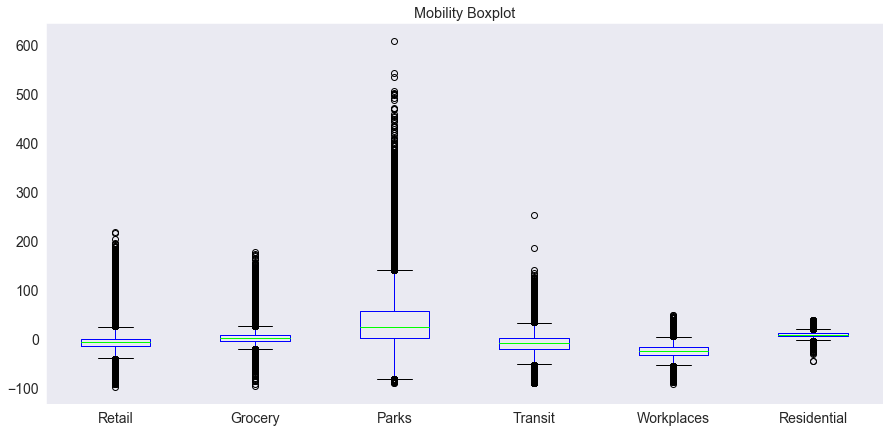

In [238]:
# Box plot of the Daily Percentage Change for all indices
mobility_df.columns = ['Retail', 'Grocery', 'Parks', 'Transit', 'Workplaces', 'Residential']
mobility_df.plot(kind='box', figsize=(15,7), colormap='brg', title="Mobility Boxplot", fontsize = '14')
plt.savefig("Figures/Mobility Boxplot")
plt.show()

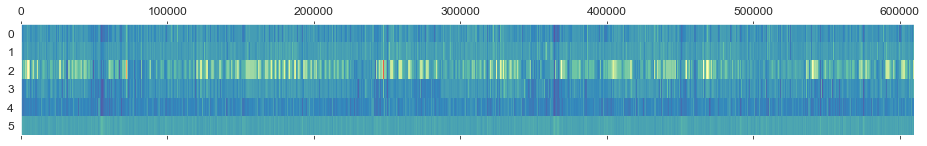

In [239]:
# Mobility Heatmap
heatmap = mobility_df.T
plt.matshow(heatmap, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

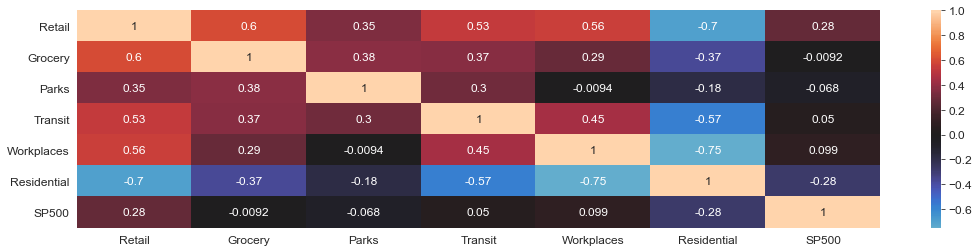

In [240]:
# Correlation Plot
mobility_sp500_df = df_graph.drop(columns=['month','sub_region_1'])
mobility_sp500_df.columns = ['Retail', 'Grocery', 'Parks', 'Transit', 'Workplaces', 'Residential', 'SP500']
correlation_mat = mobility_sp500_df.corr()
plt.figure(figsize=(18,4))
sns.heatmap(correlation_mat, annot = True, center=0)
plt.show()

In [241]:
# Represent region with selected state
ny = df_graph[df_graph['sub_region_1'] == "New York"].sort_index()
fl = df_graph[df_graph['sub_region_1'] == "Florida"].sort_index()
ca = df_graph[df_graph['sub_region_1'] == "California"].sort_index()
il = df_graph[df_graph['sub_region_1'] == "Illinois"].sort_index()

In [242]:
# List mobility categories
L = ['retail_and_recreation_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

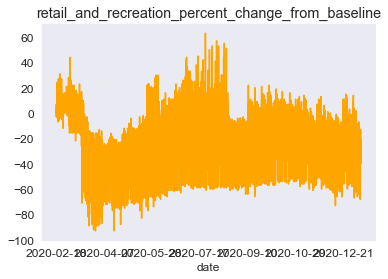

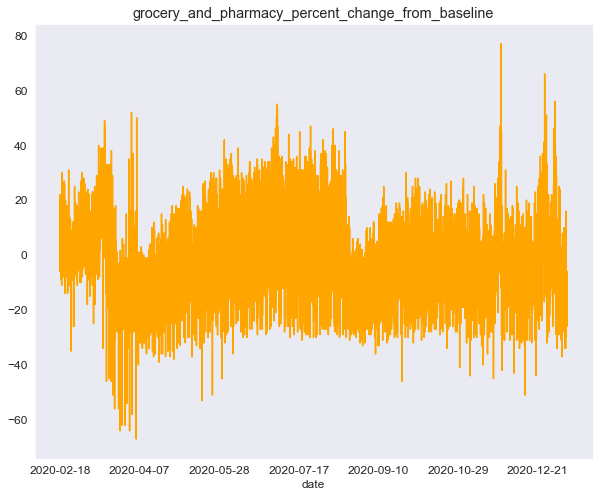

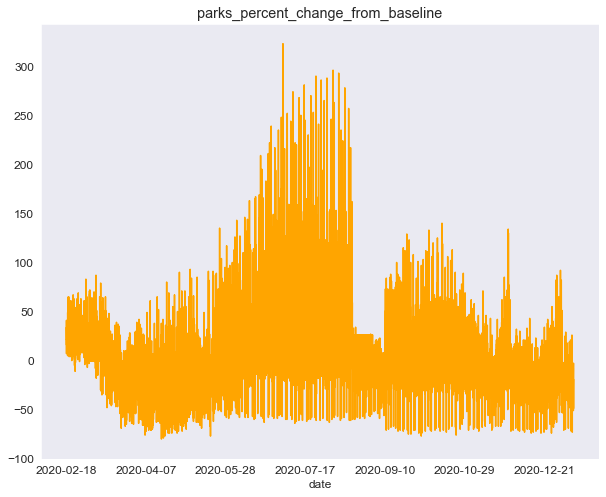

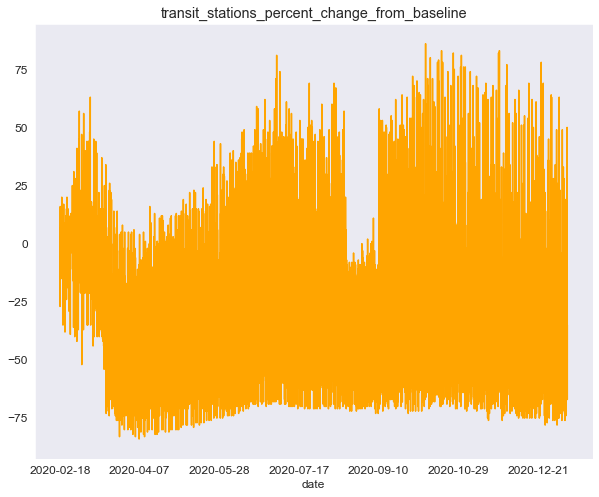

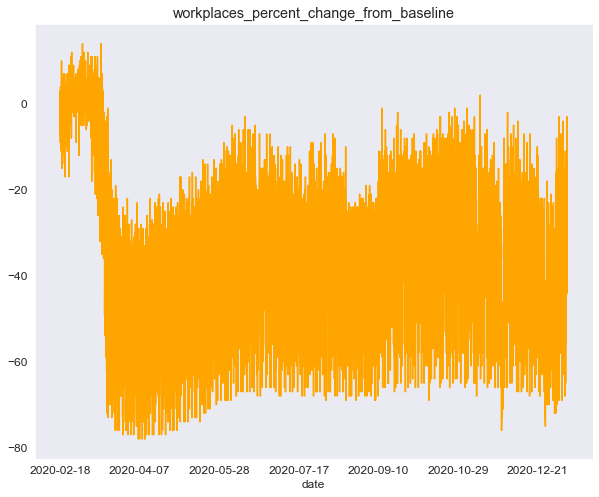

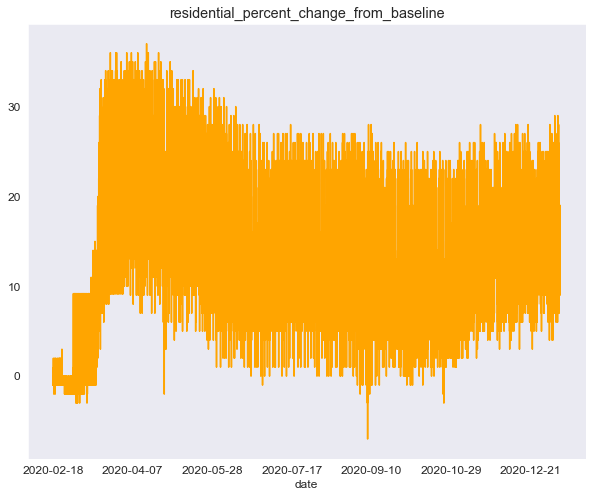

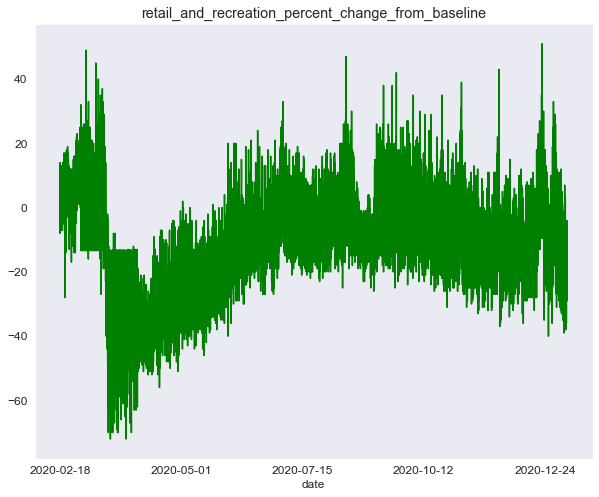

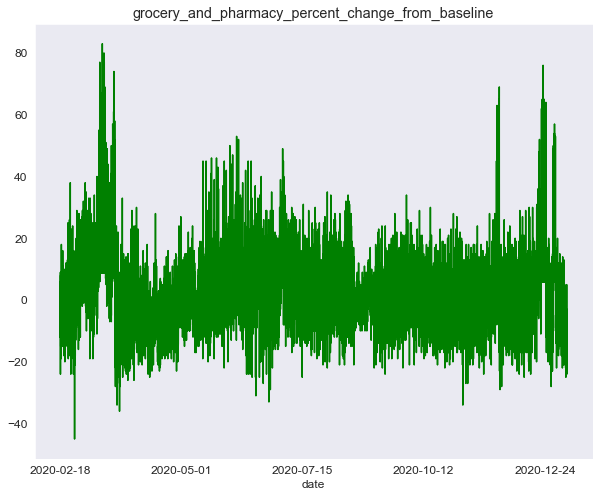

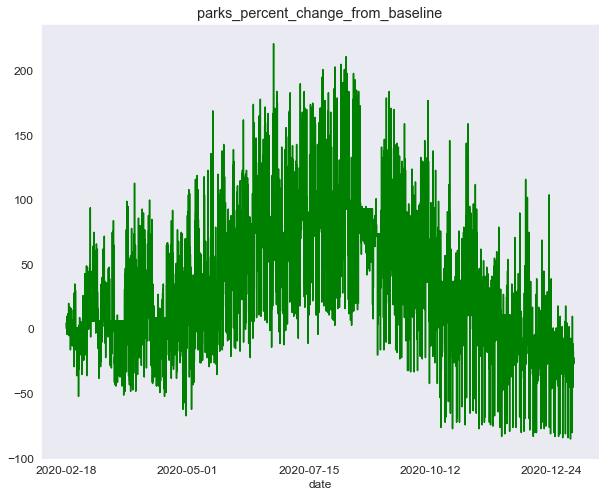

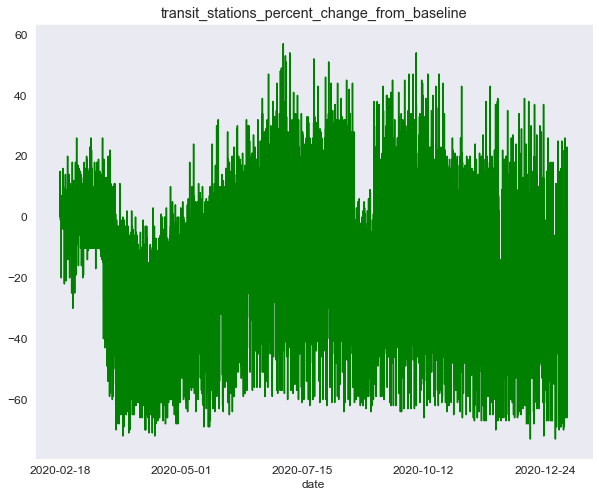

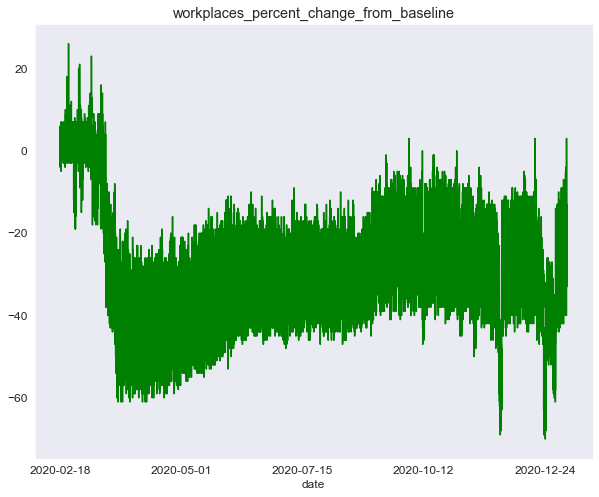

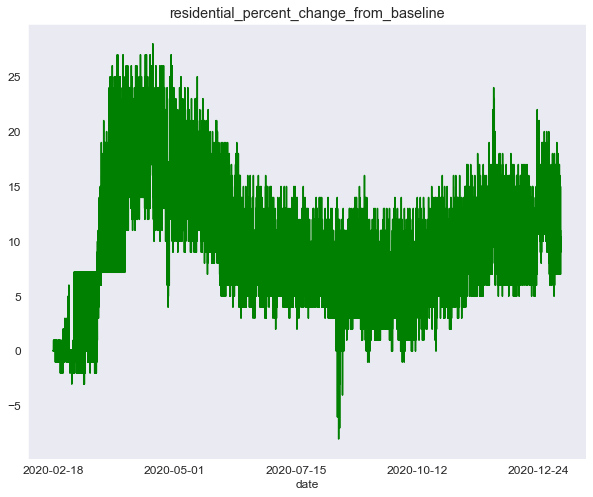

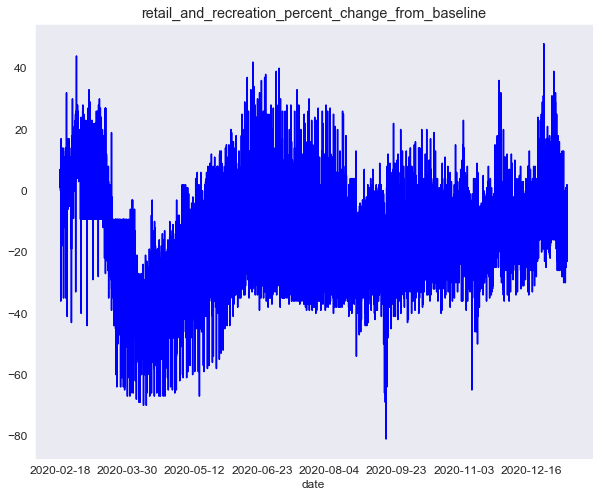

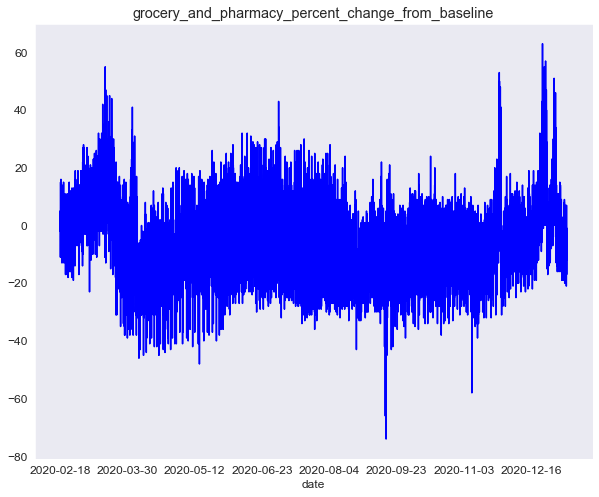

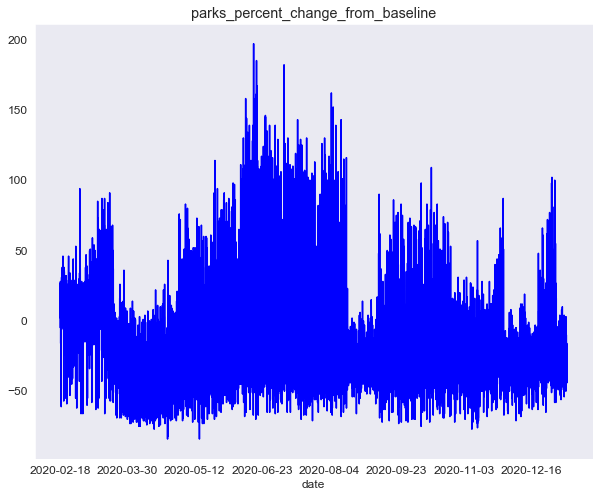

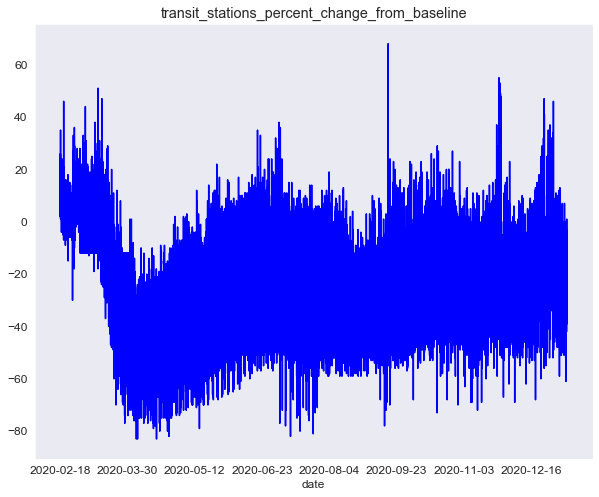

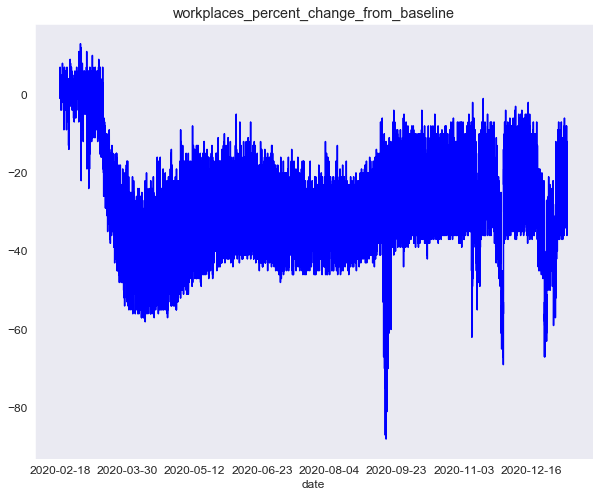

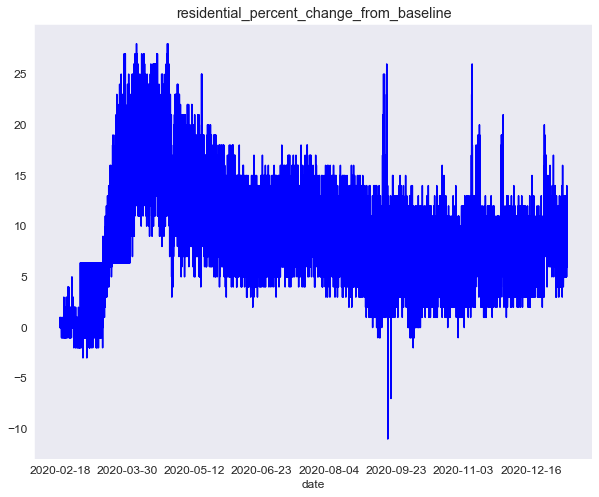

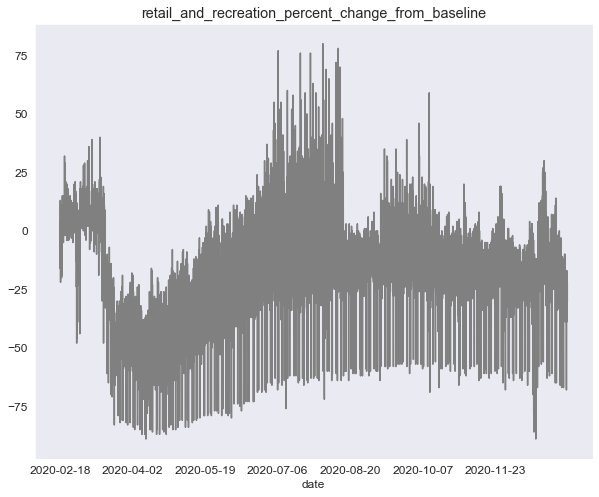

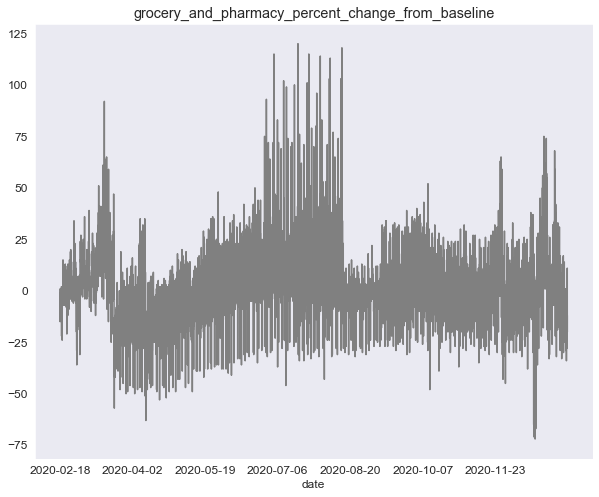

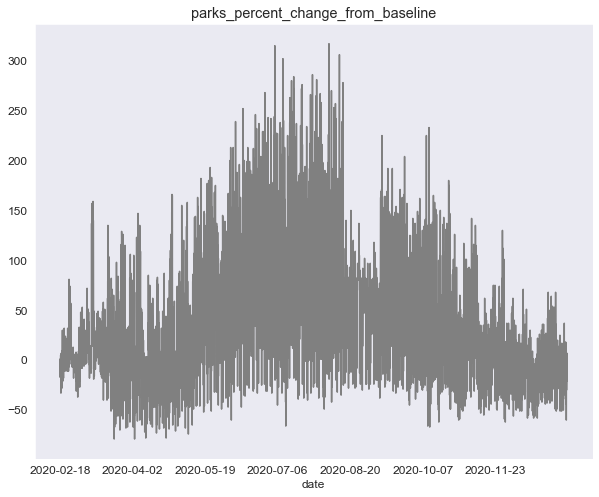

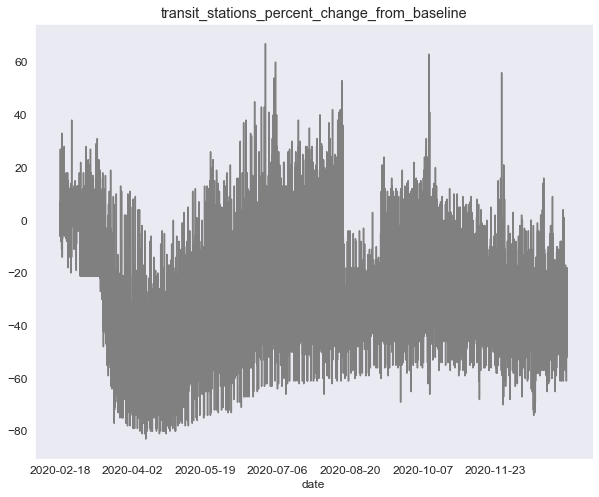

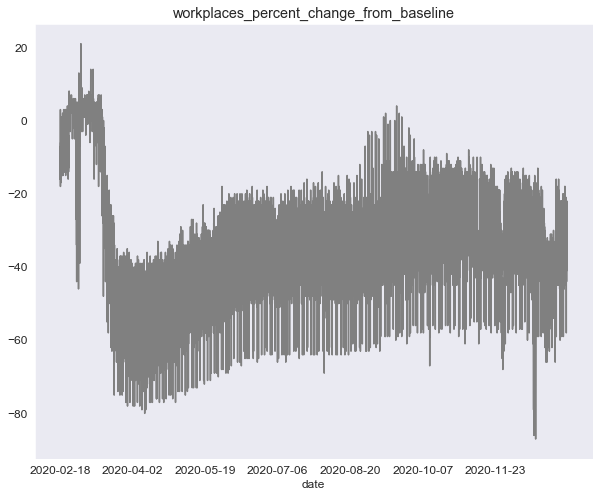

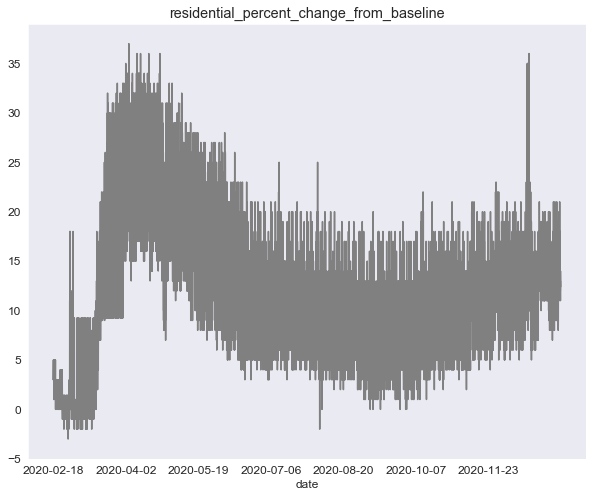

<Figure size 720x576 with 0 Axes>

In [243]:
# Plot mobility data for selected state

# California
for x in L:
    a = ca[x].plot(color = 'orange')
    a.set_title(x)
    plt.figure(figsize=(10, 8))

# Illinois
for x in L:
    a = il[x].plot(color = 'green')
    a.set_title(x)
    plt.figure(figsize=(10, 8))

# Florida
for x in L:
    a = fl[x].plot(color = 'blue')
    a.set_title(x)
    plt.figure(figsize=(10, 8))

# New York
for x in L:
    a = ny[x].plot(color = 'grey')
    a.set_title(x)
    plt.figure(figsize=(10, 8))
